# Project 4 - Wrangle and Analyze Data
<img src="https://cdn10.bostonmagazine.com/wp-content/uploads/sites/2/2017/04/WeRateDogs.jpg" style="left;width: 400px;margin:20px 0px 0px 0px"/>

This project is to do wrangle and analyze on the tweet archive known as **WeRateDogs**.  **[WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs)** is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "[they're good dogs Brent](https://knowyourmeme.com/memes/theyre-good-dogs-brent)." WeRateDogs has over 4 million followers and has received international media coverage.

**This project is consisted with the following part**

### Part 1. Wrangle
- A. Gathering data ✅
- B. Assessing data ✅
- C. Cleaning data ✅

### Part 2. Storing, Analyzing, and Visualize Data
- A. Storing cleaned data ✅
- B. Analyzing and Visualizing ✅

### Part 3. Writing report
- A. Report of wrangling ✅
- B. Report of insights with visualization ✅

**Python Package will be used**
- pandas
- NumPy
- requests
- tweepy
- json
- pickle

In [1]:
# upgrade pandas because we use pandas 1.0.4
!pip install --upgrade pandas numpy

    100% |████████████████████████████████| 10.1MB 3.9MB/s eta 0:00:01   23% |███████▍                        | 2.3MB 18.6MB/s eta 0:00:01    33% |██████████▊                     | 3.4MB 24.7MB/s eta 0:00:01    46% |███████████████                 | 4.7MB 25.8MB/s eta 0:00:01
    100% |████████████████████████████████| 20.1MB 1.7MB/s eta 0:00:01  1% |▋                               | 399kB 27.7MB/s eta 0:00:01    24% |████████                        | 5.0MB 31.5MB/s eta 0:00:01    52% |████████████████▊               | 10.5MB 27.3MB/s eta 0:00:01    65% |█████████████████████           | 13.2MB 22.4MB/s eta 0:00:01    97% |███████████████████████████████▏| 19.6MB 29.2MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully unin

In [26]:
# Import the python packages
# Packages that is not imported in this moment is mostly one-time usage
# So imported right away when that package is needed below
import pandas as pd
import numpy as np
import pickle
import json

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for autoplot!
% matplotlib inline

## Part 1. Wrangle

As a three step we are going to gather data and assess to check the quality, tidiness and finally going to clean the data and make the master dataset to use for further analyzing

### A. Gathering data ✅

> **We are going to download the files that has the data we are going to use for analyze!**

1. WeRateDogs Twitter archieve 
2. Tweet image prediction
3. Each tweet's additional information gathered using tweepy library
    - retweet count, favorite("like) count at minimum

**After this process we will get 3 files**
1. twitter-archieve-enhanced.csv
2. image-predictions.csv
3. tweet-api.csv

**At here we are going to use 3 methods of gathering data**
1. Downloading manually using graphical interface
2. Using python request packages programmatically
3. Using tweeter API to download additional information about each tweets

#### 1. WeRateDogs Twitter archieve
Download `twitter_archive_enhanced.csv` file manually using graphical interface.
<br><br>
Click the following url to download $\rightarrow$ **[twitter-archive-enhanced.csv](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv)**

In [2]:
# check the twitter_archieve_enhanced.csv file
twitter_df = pd.read_csv('twitter-archive-enhanced.csv')

# Check is this file successfully imported
twitter_df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


#### 2. Tweet image prediction
We are going to download the `image-prediction.tsv` file programmatically using [Request](https://pypi.org/project/requests/) library. We are going to save this file to `image-prediction.csv`file to keep the extension constant.
<br><br>
Use the following url $\rightarrow$ **https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv**

In [10]:
import requests

# url for image-predictions.tsv
image_prediction_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
filename = "image-predictions.tsv"

# Request the data programmatically
# Check is the requests failed or not
try:
    response = requests.get(image_prediction_url)
    with open(filename, mode='wb') as f:
        f.write(response.content)
except requests.exceptions.RequestException as e:
    raise SystemExit(e)

In [11]:
# check the image-predictions.tsv file
# This is tab seperated file so we should pass sep variable as \t
image_df = pd.read_csv('image-predictions.tsv', sep='\t')

# Check is this file successfully imported
image_df.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [12]:
# for consistency save the file to csv file
image_df.to_csv('image-predictions.csv', index=False)

In [13]:
image_df = pd.read_csv('image-predictions.csv')

# Check is this file successfully saved
image_df.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 3. Each tweet's additional information gathered using tweepy library

Below is the tweety code supported by udacity. The code will download each tweet id's additional informations using twitter API and store it in to file `tweet_json.txt`. After storing we will read the `tweet_json.txt` file one line by line and generate a pandas dataframe and store the information to the `tweet-api.csv` file.

In [ ]:
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = ⛔
consumer_secret = ⛔
access_token = ⛔
access_secret = ⛔

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [ ]:
# Store the information about failure using pickle
with open('api_failed.pkl', 'wb') as f:
    pickle.dump(fails_dict, f)

We won't try to find the failed tweet ids at here and treat this at the **Cleaning data** session

In [2]:
# Check is the value stored correctly
with open('api_failed.pkl', 'rb') as f:
    failed_dict = pickle.load(f)
print(failed_dict)

{888202515573088257: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 873697596434513921: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 872668790621863937: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 872261713294495745: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 869988702071779329: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 866816280283807744: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 861769973181624320: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 856602993587888130: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 851953902622658560: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 845459076796616705: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 844704788403113984: TweepError([{'code': 144, 'message': 'N

In [29]:
# Read json datas one by one and generate pandas dataframe
with open('tweet_json.txt', encoding='utf-8') as f:
    # Store line by line to list to iterate and remove the \n character using rstrip()
    lines = [line.rstrip() for line in f]
    
    observations = []
    for line in lines:
        # Convert string to json
        tweet_json = json.loads(line)
        
        # Use pretty printing for checking
        # This is only used when we are checking the entity!
        # print(json.dumps(tweet_json, indent=2))

        # parse id, retweet_count, favorite_count information
        tweet_id = tweet_json['id']
        retweet_count = tweet_json['retweet_count']
        favorite_count = tweet_json['favorite_count']
        
        # At the cleaning stage I found some problem with wrong expanded_urls
        # This information will be used to treat the problem
        try:
            expanded_url = tweet_json['entities']['media'][0]['expanded_url']
        except:
            expanded_url = tweet_json['user']['entities']['url']['urls'][0]['expanded_url']
            
        # Store observation row by row
        observations.append({'tweet_id': tweet_id,
                             'retweet_count': retweet_count,
                             'favorite_count': favorite_count,
                             'expanded_url': expanded_url})
    
    # Generate tweet_api dataframe
    tweet_api = pd.DataFrame(observations, columns=['tweet_id',
                                                    'retweet_count',
                                                    'favorite_count',
                                                    'expanded_url'])

In [30]:
# check the tweet_api dataframe
tweet_api.head(5)

,tweet_id,retweet_count,favorite_count,expanded_url
0,892420643555336193,7703,36188,https://twitter.com/dog_rates/status/892420643...
1,892177421306343426,5697,31216,https://twitter.com/dog_rates/status/892177421...
2,891815181378084864,3777,23503,https://twitter.com/dog_rates/status/891815181...
3,891689557279858688,7869,39486,https://twitter.com/dog_rates/status/891689557...
4,891327558926688256,8479,37705,https://twitter.com/dog_rates/status/891327558...


In [33]:
# Save the tweet_api dataframe to tweet_api.csv file
tweet_api.to_csv('tweet-api.csv', index=False)

In [34]:
api_df = pd.read_csv('tweet-api.csv')

# Check is this file successfully imported
api_df.head(5)

,tweet_id,retweet_count,favorite_count,expanded_url
0,892420643555336193,7703,36188,https://twitter.com/dog_rates/status/892420643...
1,892177421306343426,5697,31216,https://twitter.com/dog_rates/status/892177421...
2,891815181378084864,3777,23503,https://twitter.com/dog_rates/status/891815181...
3,891689557279858688,7869,39486,https://twitter.com/dog_rates/status/891689557...
4,891327558926688256,8479,37705,https://twitter.com/dog_rates/status/891327558...


### B. Assessing data ✅

> **We are going to assess the files to get understanding of the dataset and check the tidiness issues and quality issues to be fixed**

1. Visual assessment
2. Programmatic assessment
3. Tidiness issues
4. Quality issues

**We have 3 files to look at**
1. twitter-archieve-enhanced.csv
2. image-predictions.csv
3. tweet-api.csv

In [17]:
# Generate 3 dataframe for each csv files
tweet_df = pd.read_csv('twitter-archive-enhanced.csv')
image_df = pd.read_csv('image-predictions.csv')
api_df = pd.read_csv('tweet-api.csv')

#### 1. Visual assessment

Check the files that we have using visual assessment

In [16]:
tweet_df.expanded_urls[0]

'https://twitter.com/dog_rates/status/892420643555336193/photo/1'

In [3]:
# check tweet_df
tweet_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


There is 2356 tweet datas here. And each row has 17 columns.

[**Twitter developer page - Tweet objects**](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object) was used as reference

tweet_df columns

- **tweet_id** : Unique IDs for objects within twitter
- **in_reply_to_status_id** : Nullable. If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet's ID
- **in_reply_to_user_id** : Nullable. If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet's author ID. This will not necessarily always be the user directly mentioned in the Tweet.
- **timestamp** : The timestamp that the tweet was created
- **source** : Utility used to post the Tweet, as an HTML-formatted string. Tweets from the Twitter website have a source value `web`
- **text** : The actual UTF-8 text written in Tweet including `url`
- **retweeted_status_id** : Same with **in_reply_to_status_id**
- **retweeted_status_user_id** : Same with **in_reply_to_user_id**
- **retweeted_status_timestamp** : Nullable. If the represented Tweet is a reply, this will contain the original Tweet's timestamp
- **expanded_urls** : The tweet's url
- **rating_numerator** : Numerator of the ratings. Originally formatted e.g. 13/10
- **rating_denominator** : Denominator of the ratings. Originally formatted e.g. 13/10
- **name** : Name of dog posted on the tweet
- **doggo** : A cute way of saying dog. It's a bigger version of a **pupper**.
- **floofer** : An animal of thing that's fluffy and soft
- **pupper** : A tiny **doggo**
- **puppo** : A cute dog or puppy

In [19]:
# check image_df
image_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


There is 2075 tweet datas here. And each row has 12 columns.

image_df columns

- **tweet_id** : Unique IDs for objects within twitter
- **jpg_url** : Url for the image posted on the tweet
- **img_num** : Image number that the tweet has (numbered 1 to 4 since tweets can have up to four images)
- **p1** : Algorithm's **#1** prediction for the image in the tweet
- **p1_conf** : How confident the algorithm is in its **#1** prediction
- **p1_dog** : Whether or not the **#1** prediction is a breed of dog
- **p2** : Algorithm's **#2** prediction for the image in the tweet
- **p2_conf** : How confident the algorithm is in its **#2** prediction
- **p2_dog** : Whether or not the **#2** prediction is a breed of dog
- **p3** : Algorithm's **#3** prediction for the image in the tweet
- **p3_conf** : How confident the algorithm is in its **#3** prediction
- **p3_dog** : Whether or not the **#3** prediction is a breed of dog

In [18]:
# check api_df
api_df

,tweet_id,retweet_count,favorite_count,expanded_url
0,892420643555336193,7703,36188,https://twitter.com/dog_rates/status/892420643...
1,892177421306343426,5697,31216,https://twitter.com/dog_rates/status/892177421...
2,891815181378084864,3777,23503,https://twitter.com/dog_rates/status/891815181...
3,891689557279858688,7869,39486,https://twitter.com/dog_rates/status/891689557...
4,891327558926688256,8479,37705,https://twitter.com/dog_rates/status/891327558...
5,891087950875897856,2842,18989,https://twitter.com/dog_rates/status/891087950...
6,890971913173991426,1847,11060,https://twitter.com/dog_rates/status/890971913...
7,890729181411237888,17194,60981,https://twitter.com/dog_rates/status/890729181...
8,890609185150312448,3912,26142,https://twitter.com/dog_rates/status/890609185...
9,890240255349198849,6690,29889,https://twitter.com/dog_rates/status/890240255...


There is 2331 tweet datas here. And each row has 3 columns.

api_df columns

- **tweet_id** : Unique IDs for objects within twitter
- **retweet_count** : Number that indicate how many retweets does the tweet has?
- **favorite_count** : Number that indicate how many likes(favorites) does the tweet has?
- **expanded_url** : The url of the tweet

#### 2. Programmatic assessment

Check the files that we have using programmatic assessment. Below is a common methods used in pandas for programmatic assessment.
- `head` (DataFrame and Series)
- `tail` (DataFrame and Series)
- `sample` (DataFrame and Series)
- `info` (Dataframe only)
- `describe` (DataFrame and Series)
- `value_counts` (Series only)
- `duplicated` (DataFrame and Series)
- Various methods of indexing and selecting data (ex. `iloc`, `loc`)


**tweet_df**

In [18]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

`in_reply_to_status_id` is same with `retweeted_status_id` but the value is not recorded at both column for one row!
`in_reply_to_user_id` and `retweeted_status_user_id` is same!

In [38]:
# Check the duplicated values
tweet_df[['in_reply_to_status_id', 'retweeted_status_id']].query('in_reply_to_status_id == in_reply_to_status_id and retweeted_status_id == retweeted_status_id')

,in_reply_to_status_id,retweeted_status_id


In [37]:
# Check the duplicated values
tweet_df[['in_reply_to_user_id', 'retweeted_status_user_id']].query('in_reply_to_user_id == in_reply_to_user_id and retweeted_status_user_id == retweeted_status_user_id')

,in_reply_to_user_id,retweeted_status_user_id


In [37]:
# Check the duplicated values
tweet_df[['in_reply_to_user_id', 'retweeted_status_user_id']].query('in_reply_to_user_id == in_reply_to_user_id and retweeted_status_user_id == retweeted_status_user_id')

,in_reply_to_user_id,retweeted_status_user_id


In [39]:
tweet_df.query('retweeted_status_timestamp == retweeted_status_timestamp').head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None


In [19]:
tweet_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [55]:
# Check the name values
tweet_df.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Cooper       11
Lucy         11
Tucker       10
Penny        10
Lola         10
Winston       9
Bo            9
the           8
Sadie         8
Toby          7
Buddy         7
an            7
Daisy         7
Bailey        7
Oscar         6
Jack          6
Scout         6
Koda          6
Bella         6
Stanley       6
Milo          6
Rusty         6
Jax           6
Dave          6
Leo           6
Finn          5
           ... 
Aubie         1
Murphy        1
Howie         1
Bloo          1
Freddery      1
Bertson       1
Rufio         1
Fillup        1
Zeek          1
Devón         1
Stormy        1
Furzey        1
Ember         1
Willem        1
Diogi         1
Walker        1
Covach        1
Chesney       1
Terrenth      1
Billl         1
Stuart        1
Harry         1
Kara          1
Holly         1
Jeffri        1
Steve         1
Spencer       1
Bradley       1
Mingus        1
Lugan         1
Name: name, Length: 957,

In [57]:
# Check duplicated
tweet_df[tweet_df.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [101]:
# Check tweet_id duplicated
tweet_df[tweet_df.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [33]:
# check how many tweet_id doens't match with the expanded_urls tweet_id
url_df = tweet_df.copy()[['tweet_id', 'expanded_urls']]
url_df.head()

,tweet_id,expanded_urls
0,892420643555336193,https://twitter.com/dog_rates/status/892420643...
1,892177421306343426,https://twitter.com/dog_rates/status/892177421...
2,891815181378084864,https://twitter.com/dog_rates/status/891815181...
3,891689557279858688,https://twitter.com/dog_rates/status/891689557...
4,891327558926688256,https://twitter.com/dog_rates/status/891327558...


In [41]:
# Extract the number from the expanded_urls
url_df['url_tweet_id'] = url_df.expanded_urls.str.extract(r'(\d+)')

In [44]:
url_df[url_df['url_tweet_id'].isnull()]

,tweet_id,expanded_urls,url_tweet_id
30,886267009285017600,NaN,NaN
55,881633300179243008,NaN,NaN
64,879674319642796034,NaN,NaN
113,870726314365509632,NaN,NaN
148,863427515083354112,NaN,NaN
179,857214891891077121,NaN,NaN
185,856330835276025856,NaN,NaN
186,856288084350160898,NaN,NaN
188,855862651834028034,NaN,NaN
189,855860136149123072,NaN,NaN


**image_df**

In [41]:
image_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1396,767884188863397888,https://pbs.twimg.com/media/CqgSl4DWcAA-x-o.jpg,3,coral_reef,0.327740,False,cliff,0.157182,False,lakeside,0.048810,False
1739,822462944365645825,https://pbs.twimg.com/media/C2n5rUUXEAIXAtv.jpg,3,Pomeranian,0.960199,True,Samoyed,0.023056,True,Maltese_dog,0.008945,True
412,673919437611909120,https://pbs.twimg.com/media/CVo-JuMWwAAet6F.jpg,1,jack-o'-lantern,0.172079,False,schipperke,0.115984,True,miniature_pinscher,0.052175,True
1627,804413760345620481,https://pbs.twimg.com/media/CuRDF-XWcAIZSer.jpg,1,chow,0.090341,True,binoculars,0.083499,False,Irish_setter,0.077456,True
705,684940049151070208,https://pbs.twimg.com/media/CYFlVUFWwAAEsWX.jpg,2,Border_collie,0.665578,True,collie,0.176846,True,Old_English_sheepdog,0.065175,True


In [42]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [46]:
image_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [54]:
# Check the prediction values
pd.concat([image_df.p1, image_df.p2, image_df.p3]).value_counts()

golden_retriever                  290
Labrador_retriever                283
Chihuahua                         185
Pembroke                          143
Cardigan                          115
Pomeranian                        109
toy_poodle                        105
pug                                97
chow                               96
cocker_spaniel                     95
French_bulldog                     93
Chesapeake_Bay_retriever           91
Eskimo_dog                         83
beagle                             77
kuvasz                             76
Siberian_husky                     72
Samoyed                            70
Staffordshire_bullterrier          70
malamute                           69
Pekinese                           63
kelpie                             62
American_Staffordshire_terrier     58
miniature_pinscher                 57
Great_Pyrenees                     55
miniature_poodle                   54
collie                             51
seat_belt   

In [61]:
# Check duplicated
image_df[image_df.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [107]:
# Check tweet_id duplicated
image_df[image_df.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


**api_df**

In [19]:
api_df.tail(5)

,tweet_id,retweet_count,favorite_count,expanded_url
2326,666049248165822465,39,96,https://twitter.com/dog_rates/status/666049248...
2327,666044226329800704,132,271,https://twitter.com/dog_rates/status/666044226...
2328,666033412701032449,41,112,https://twitter.com/dog_rates/status/666033412...
2329,666029285002620928,42,121,https://twitter.com/dog_rates/status/666029285...
2330,666020888022790149,461,2411,https://twitter.com/dog_rates/status/666020888...


In [20]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
tweet_id          2331 non-null int64
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
expanded_url      2059 non-null object
dtypes: int64(3), object(1)
memory usage: 72.9+ KB


In [21]:
api_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,2703.425997,7555.709567
std,6.823170e+16,4571.240603,11730.108298
min,6.660209e+17,1.000000,0.000000
25%,6.782670e+17,546.500000,1318.000000
50%,7.182469e+17,1267.000000,3283.000000
75%,7.986692e+17,3142.000000,9255.000000
max,8.924206e+17,77776.000000,156184.000000


In [22]:
# Check duplicated
api_df[api_df.duplicated()]

,tweet_id,retweet_count,favorite_count,expanded_url


In [108]:
# Check tweet_id duplicated
api_df[api_df.tweet_id.duplicated()]

,tweet_id,retweet_count,favorite_count,expanded_url


#### 3. Tidiness issues

Following to this article **([Tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html))** tidy data is a standard way of mapping of a dataset to its structure. A dataset is messy or tidy depending on how rows, columns and tables are matched up with observations, variables and types. Tidy data follows 3 rules.

1. Each variable forms a column
2. Each observation forms a row
3. Each type of observational unit forms a table

**5 most common tidiness issues**

1. Column headers are values, not variable names
2. Multiple variables are stored in one column
3. Variables are stored in both rows and columns
4. Multiple types of observational units are stored in the same table
5. A single observational unit is stored in multiple tables

- `tweet_df`, `image_df`, `api_df` are single observational unit as a tweet so should be in one table
- `tweet_df`'s **text** column has multiple variables
- `image_df` has 4 variables in 9 columns (order, prediction, confidence, is_dog)

#### 4. Quality issues

Data quality is related to content. If there is issues with content we say dirty data. It could be inaccurate, corrupted, or duplicted data. We can consider **Data quality dimensions** when we deal with qualtiy issues.

**Data quality dimensions**
- **`Completeness`** : Do we have all of the records that we should? Do we have missing records or not? Are there specific rows, columns, or cells missing?
- **`Validity`** : We have the records, but they're not valid, i.e., they don't conform to a defined schema. A schema is a defined set of rules for data. These rules can be real-world constraints (e.g. negative height is impossible) and table-specific constraints (e.g. unique key contraints in tables).
- **`Accuracy`** : Inaccurate data is wrong data that is valid. It adheres to the defined schema, but it is still incorrect. (e.g. A patients weight that is 5 lbs too heavy because the scale was faulty.)
- **`Consistency`** : Inconsistent data is both valid and accurate, but there are multiple correct ways of referring to the same thing. Consistency, i.e., a standard format, in columns that represent the same data across tables and/or within tables is desired.


**`tweet_df`**
- `text` column has duplicated value with `expanded_url`, `rating_numerator`, `rating_denominator`.
- `retweeted_status_id`, `retweeted_status_user_id` is same with `in_reply_to_status_id`, `in_reply_to_user_id`
- column `source` includes HTML formatted information
- Erroneous datatypes (timestamp, source, retweeted_status_timestamp, doggo, floofer, pupper, puppo)
- `name` column has inconsistent name format. Some includes uppercase but some doesn't
- `expanded_urls` has missing values
- `tweet_id` doesn't match with the `expanded_urls`'s **tweet_id** and `url` is repeated several times delimited with `,`
- some `tweet_id` is invalid
- **NULL** is represented as `None` in `name`, `doggo`, `floofer`, `pupper`, `puppo` columns
- `doggo`, `floofer`, `pupper`, `puppo` columns save the value as the variable name(e.g. doggo column include `doggo` value when the dog is applicable) itself rather then `yes` or `1`
- `rating_numerator` and `rating_denominator` has inaccurate values

**`image_df`**
- `p1`, `p2`, `p3` columns format is not consistent. The lowercase and uppercase is mixed without consistent and `-`, `_` is used both as delimiter

**`api_df`**
- Missing records (2331 instead of 2356)

### C. Cleaning data ✅

> **We now know the tidiness and quality issues of our datasets and now we are going to fix it to make the master dataset**

1. Missing data
2. Tidiness
3. Quality

**The format of cleaning**
1. Define
2. Code
3. Test

**Caveat**

The issues were chosen while working on **Assesing data** session so we are brining the issues right away from it. So even we made a new copy of tables which is named as `tweet_clean`, `image_clean`, `api_clean` the issues will be mentioning about `tweet_df`, `image_df`, `api_df`. This might be confusing so be aware of this. I did it by intent to make consistency with the **Assessing data** session. But the ***Define*** will correctly mention what table to modify.

In [2]:
# Generate 3 dataframe for each csv files
tweet_df = pd.read_csv('twitter-archive-enhanced.csv')
image_df = pd.read_csv('image-predictions.csv')
api_df = pd.read_csv('tweet-api.csv')

In [3]:
# copy of original data
tweet_clean = tweet_df.copy()
image_clean = image_df.copy()
api_clean = api_df.copy()

#### 1. Missing data

- `api_df` Missing records (2331 instead of 2356)
- `tweet_df`'s `expanded_urls` has missing values
- some `tweet_id` is invalid
> **Even this is not an missing data issue this is the most important column of all so we have to fix this column for the rest of the cleaning**

##### `api_df` Missing records (2331 instead of 2356)
##### some `tweet_id` is invalid

***Define***

We will check the `failed_dict` to find out which tweet failed to load the information and check is it possible to achieve still. By merging with `tweet_df` we could get `url` to check is the tweet still exist or not. If so then download it manually and add the information to the `api_df`. Also we will fix the invalid `tweet_id` of all the tables for the sake of comfortable cleaning. After the `tweet_id` is all valid we will fill the 25 missing records of `api_df` by using **tweepy** again and if the value is still missing we will gonna fill it wil `np.nan`

***Code***

In [4]:
# Load the api_failed.pkl
with open('api_failed.pkl', 'rb') as f:
    failed_dict = pickle.load(f)
print(failed_dict)

{888202515573088257: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 873697596434513921: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 872668790621863937: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 872261713294495745: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 869988702071779329: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 866816280283807744: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 861769973181624320: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 856602993587888130: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 851953902622658560: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 845459076796616705: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 844704788403113984: TweepError([{'code': 144, 'message': 'N

In [5]:
# Store the tweet ids to the list
failed_tweet_ids = list(failed_dict.keys())
print('total amount of failed response of getting tweet information is {}'.format(len(failed_tweet_ids)))

total amount of failed response of getting tweet information is 25


In [6]:
# Generate pandas datafrome
missing_df = pd.DataFrame(failed_tweet_ids, columns=['tweet_id'])

# merge with the tweet_df to get information of url
missing_urls_df = pd.merge(missing_df, tweet_clean, how='left', on='tweet_id')[['tweet_id', 'expanded_urls', 'rating_numerator', 'name']]

In [7]:
# check the urls
for i in range(25):
    print(missing_urls_df.tweet_id[i])
    print(missing_urls_df.expanded_urls[i])

888202515573088257
https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1
873697596434513921
https://twitter.com/dog_rates/status/868880397819494401/photo/1,https://twitter.com/dog_rates/status/868880397819494401/photo/1
872668790621863937
https://twitter.com/loganamnosis/status/872657584259551233/photo/1
872261713294495745
https://twitter.com/dog_rates/status/872261713294495745/photo/1,https://twitter.com/dog_rates/status/872261713294495745/photo/1
869988702071779329
https://twitter.com/dog_rates/status/859196978902773760/video/1
866816280283807744
https://twitter.com/dog_rates/status/866450705531457537/photo/1,https://twitter.com/dog_rates/status/866450705531457537/photo/1
861769973181624320
https://twitter.com/dog_rates/status/806629075125202948/photo/1,https://twitter.com/dog_rates/st

We could see that the `tweet_df` has quality issues in `expanded_urls` column.
1. The `tweet_id` doesn't match with the `url`'s **tweet_id**
2. Url is repeated several times delimited with `,`

This problem will be added to assess session. At here we will clean the 25 expanded_urls quality to find the problem.

In [8]:
# clean the expanded_urls of missing_urls_df
missing_urls_df.expanded_urls = missing_urls_df.expanded_urls.str.split(',').str[0]

**We are going to check manually here**

888202515573088257
https://twitter.com/dog_rates/status/887473957103951883/photo/1 $\rightarrow$ **tweet_id** wrong<br>
873697596434513921
https://twitter.com/dog_rates/status/868880397819494401/photo/1 $\rightarrow$ **tweet_id** wrong<br>
872668790621863937
https://twitter.com/loganamnosis/status/872657584259551233/photo/1 $\rightarrow$ **tweet_id** wrong / hidden tweet<br>
872261713294495745
https://twitter.com/dog_rates/status/872261713294495745/photo/1 $\rightarrow$ hidden tweet<br>
869988702071779329
https://twitter.com/dog_rates/status/859196978902773760/video/1 $\rightarrow$ **tweet_id** wrong<br>
866816280283807744
https://twitter.com/dog_rates/status/866450705531457537/photo/1 $\rightarrow$ **tweet_id** wrong<br>
861769973181624320
https://twitter.com/dog_rates/status/806629075125202948/photo/1 $\rightarrow$ **tweet_id** wrong<br>
856602993587888130
https://twitter.com/dog_rates/status/844704788403113984/photo/1 $\rightarrow$ **tweet_id** wrong / hidden tweet<br>
851953902622658560
https://twitter.com/dog_rates/status/829374341691346946/photo/1 $\rightarrow$ **tweet_id** wrong / hidden tweet<br>
845459076796616705
https://twitter.com/dog_rates/status/756288534030475264/photo/1 $\rightarrow$ **tweet_id** wrong<br>
844704788403113984
https://twitter.com/dog_rates/status/844704788403113984/photo/1 $\rightarrow$ hidden tweet<br>
842892208864923648
https://twitter.com/dog_rates/status/807106840509214720/video/1 $\rightarrow$ **tweet_id** wrong<br>
837366284874571778
https://twitter.com/dog_rates/status/837366284874571778/photo/1 $\rightarrow$ hidden tweet<br>
837012587749474308
https://twitter.com/KennyFromDaBlok/status/837011344666812416/photo/1 $\rightarrow$ hidden tweet<br>
829374341691346946
https://twitter.com/dog_rates/status/829374341691346946/photo/1 $\rightarrow$ hidden tweet<br>
827228250799742977
https://twitter.com/dog_rates/status/694669722378485760/photo/1 $\rightarrow$ **tweet_id** wrong<br>
812747805718642688
https://twitter.com/dog_rates/status/680055455951884288/photo/1 $\rightarrow$ **tweet_id** wrong / hidden tweet<br>
802247111496568832
https://twitter.com/dog_rates/status/779056095788752897/photo/1 $\rightarrow$ **tweet_id** wrong<br>
779123168116150273
https://twitter.com/dog_rates/status/779123168116150273/photo/1 $\rightarrow$ hidden tweet<br>
775096608509886464
https://twitter.com/dog_rates/status/740373189193256964/photo/1 $\rightarrow$ **tweet_id** wrong<br>
771004394259247104
https://twitter.com/katieornah/status/771002130450743296/photo/1 $\rightarrow$ **tweet_id** wrong / hidden tweet<br>
770743923962707968
https://twitter.com/dog_rates/status/739238157791694849/video/1 $\rightarrow$ **tweet_id** wrong<br>
759566828574212096
https://twitter.com/dog_rates/status/739544079319588864/photo/1 $\rightarrow$ **tweet_id** wrong<br>
754011816964026368
https://twitter.com/dog_rates/status/754011816964026368/photo/1 $\rightarrow$ hidden tweet<br>
680055455951884288
https://twitter.com/dog_rates/status/680055455951884288/photo/1 $\rightarrow$ hidden tweet<br>

In [9]:
missing_urls_df

,tweet_id,expanded_urls,rating_numerator,name
0,888202515573088257,https://twitter.com/dog_rates/status/887473957...,13,Canela
1,873697596434513921,https://twitter.com/dog_rates/status/868880397...,14,Walter
2,872668790621863937,https://twitter.com/loganamnosis/status/872657...,14,None
3,872261713294495745,https://twitter.com/dog_rates/status/872261713...,13,Harry
4,869988702071779329,https://twitter.com/dog_rates/status/859196978...,12,quite
5,866816280283807744,https://twitter.com/dog_rates/status/866450705...,13,Jamesy
6,861769973181624320,https://twitter.com/dog_rates/status/806629075...,13,None
7,856602993587888130,https://twitter.com/dog_rates/status/844704788...,13,Luna
8,851953902622658560,https://twitter.com/dog_rates/status/829374341...,13,Astrid
9,845459076796616705,https://twitter.com/dog_rates/status/756288534...,12,None


We can see **17 tweet id** is wrong!!! We checked that the ids inside the `expanded_url` is correct so we will replace wrong `tweet_id` to the **tweet id** located inside the `expanded_url` for every table

In [10]:
# Extract the number from the expanded_urls
missing_urls_df['url_tweet_id'] = missing_urls_df.expanded_urls.str.extract(r'(\d+)')

# make a list for before and after tweet_id
before_ids = list(missing_urls_df.tweet_id)
after_ids = list(missing_urls_df.url_tweet_id)

# generate dictionary
fix_id = {}

for before_id, after_id in zip(before_ids, after_ids):
    # Pass if the id is correct
    if int(before_id) == int(after_id):
        continue
    else:
        # convert to integer value because every table stores tweet_id as int64 datatype
        fix_id[int(before_id)] = int(after_id)

# check the dictionary
print(fix_id)

{888202515573088257: 887473957103951883, 873697596434513921: 868880397819494401, 872668790621863937: 872657584259551233, 869988702071779329: 859196978902773760, 866816280283807744: 866450705531457537, 861769973181624320: 806629075125202948, 856602993587888130: 844704788403113984, 851953902622658560: 829374341691346946, 845459076796616705: 756288534030475264, 842892208864923648: 807106840509214720, 837012587749474308: 837011344666812416, 827228250799742977: 694669722378485760, 812747805718642688: 680055455951884288, 802247111496568832: 779056095788752897, 775096608509886464: 740373189193256964, 771004394259247104: 771002130450743296, 770743923962707968: 739238157791694849, 759566828574212096: 739544079319588864}


**We are going to use `map` function to fix the `tweet_id` Series** in all table
- `tweet_clean`
- `image_clean`

In [11]:
def fix_tweet_id(tweet_id):
    '''
    tweet_id : The tweet id currently considering to fix
    fix_id : Dictionary that includes the information of id to fix
    '''
    fixed_id = fix_id.get(tweet_id, -1)
    
    # If the tweet id is valid return as given
    if fixed_id == -1:
        return tweet_id
    else:
        return fixed_id

In [12]:
# Fix the wrong tweet id
# api_df is not applied because it doesn't have the wrong tweet_id value
tweet_clean.tweet_id = tweet_clean.tweet_id.map(fix_tweet_id)
image_clean.tweet_id = image_clean.tweet_id.map(fix_tweet_id)

**Now we fixed the invalid tweet ids now we have to fill the missing api_clean values!**

We are going to use the **correct 25 tweet_id** to request information from twitter API

In [13]:
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = ⛔
consumer_secret = ⛔
access_token = ⛔
access_secret = ⛔

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Use 25 tweet ids that was failed at the gathering session
tweet_ids = missing_urls_df.url_tweet_id.values

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('missing_tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 887473957103951883
Success
2: 868880397819494401
Success
3: 872657584259551233
Fail
4: 872261713294495745
Fail
5: 859196978902773760
Success
6: 866450705531457537
Success
7: 806629075125202948
Success
8: 844704788403113984
Fail
9: 829374341691346946
Fail
10: 756288534030475264
Success
11: 844704788403113984
Fail
12: 807106840509214720
Success
13: 837366284874571778
Fail
14: 837011344666812416
Fail
15: 829374341691346946
Fail
16: 694669722378485760
Success
17: 680055455951884288
Fail
18: 779056095788752897
Success
19: 779123168116150273
Fail
20: 740373189193256964
Success
21: 771002130450743296
Fail
22: 739238157791694849
Success
23: 739544079319588864
Success
24: 754011816964026368
Fail
25: 680055455951884288
Fail
4.2822593850000885
{'872657584259551233': TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), '872261713294495745': TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), '844704788403113984': TweepError([{'code': 144, 'message': 'N

In [14]:
# Read json datas one by one and generate pandas dataframe
with open('missing_tweet_json.txt', encoding='utf-8') as f:
    # Store line by line to list to iterate and remove the \n character using rstrip()
    lines = [line.rstrip() for line in f]
    
    observations = []
    for line in lines:
        # Convert string to json
        tweet_json = json.loads(line)
        
        # Use pretty printing for checking
        # This is only used when we are checking the entity!
        # print(json.dumps(tweet_json, indent=2))

        # parse id, retweet_count, favorite_count information
        tweet_id = tweet_json['id']
        retweet_count = tweet_json['retweet_count']
        favorite_count = tweet_json['favorite_count']
        
        # At the cleaning stage I found some problem with wrong expanded_urls
        # This information will be used to treat the problem
        try:
            expanded_url = tweet_json['entities']['media'][0]['expanded_url']
        except:
            expanded_url = tweet_json['user']['entities']['url']['urls'][0]['expanded_url']
            
        # Store observation row by row
        observations.append({'tweet_id': tweet_id,
                             'retweet_count': retweet_count,
                             'favorite_count': favorite_count,
                             'expanded_url': expanded_url})
    
    # Generate tweet_api dataframe
    missing_api = pd.DataFrame(observations, columns=['tweet_id',
                                                      'retweet_count',
                                                      'favorite_count',
                                                      'expanded_url'])

In [15]:
missing_api

,tweet_id,retweet_count,favorite_count,expanded_url
0,887473957103951883,16388,64400,https://twitter.com/dog_rates/status/887473957...
1,868880397819494401,13425,62019,https://twitter.com/dog_rates/status/868880397...
2,859196978902773760,28632,86447,https://twitter.com/dog_rates/status/859196978...
3,866450705531457537,32929,116316,https://twitter.com/dog_rates/status/866450705...
4,806629075125202948,35436,76132,https://twitter.com/dog_rates/status/806629075...
5,756288534030475264,17809,44140,https://twitter.com/dog_rates/status/756288534...
6,807106840509214720,56670,120522,https://twitter.com/dog_rates/status/807106840...
7,694669722378485760,14307,35643,https://twitter.com/dog_rates/status/694669722...
8,779056095788752897,4599,14965,https://twitter.com/dog_rates/status/779056095...
9,740373189193256964,13271,34878,https://twitter.com/dog_rates/status/740373189...


In [16]:
# Concat two data
api_clean = pd.concat([api_clean, missing_api])

**Even we add 12 data we still have 13 missing tweet that is hidden so cannot be accessed!**

Let's add this data as **NaN**

In [17]:
fails_dict

{'872657584259551233': tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 '872261713294495745': tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 '844704788403113984': tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 '829374341691346946': tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 '837366284874571778': tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 '837011344666812416': tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 '680055455951884288': tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 '779123168116150273': tweepy.error.TweepError([

**What we can know here is that 13 missing values is now 10 left! It means we have a duplicated tweet id! After we fix the wrong tweet ids when we check duplicated tweet id at each table we can find that duplicated rows appears suddenly!**

In [18]:
# Check duplicated
tweet_clean[tweet_clean.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
123,868880397819494401,NaN,NaN,2017-05-28 17:23:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Walter. He won't start hydrotherapy wi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
135,866450705531457537,NaN,NaN,2017-05-22 00:28:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,None,None,pupper,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
253,844704788403113984,NaN,NaN,2017-03-23 00:18:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Luna. It's her first time outside and ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/844704788...,13,10,Luna,None,None,None,None
363,829374341691346946,NaN,NaN,2017-02-08 17:00:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Astrid. She's a guide doggo in trainin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/829374341...,13,10,Astrid,doggo,None,None,None
534,807106840509214720,NaN,NaN,2016-12-09 06:17:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,None,None,None,None
537,806629075125202948,NaN,NaN,2016-12-07 22:38:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Good afternoon class today we're going to lea...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/806629075...,13,10,None,None,None,None,None
751,779056095788752897,NaN,NaN,2016-09-22 20:33:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Everybody drop what you're doing and look at t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/779056095...,13,10,None,None,None,None,None
921,756288534030475264,NaN,NaN,2016-07-22 00:43:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a heartwarming scene of a single father...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/756288534...,12,10,None,None,None,None,None


In [19]:
# Check duplicated
tweet_clean.query('tweet_id == 887473957103951883')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,887473957103951883,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None


In [20]:
# Check duplicated
tweet_clean.query('tweet_id == 868880397819494401')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
95,868880397819494401,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
123,868880397819494401,NaN,NaN,2017-05-28 17:23:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Walter. He won't start hydrotherapy wi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None


In [21]:
# Check duplicated
tweet_clean.query('tweet_id == 680055455951884288')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
506,680055455951884288,NaN,NaN,2016-12-24 19:52:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Sammy. At first I was like...,6.800555e+17,4.196984e+09,2015-12-24 16:00:30 +0000,https://twitter.com/dog_rates/status/680055455...,10,10,Sammy,None,None,None,None
1726,680055455951884288,NaN,NaN,2015-12-24 16:00:30 +0000,"<a href=""https://about.twitter.com/products/tw...","Meet Sammy. At first I was like ""that's a snow...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/680055455...,10,10,Sammy,None,None,None,None


In [22]:
# Check duplicated
image_clean[image_clean.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1349,739544079319588864,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1615,779056095788752897,https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg,1,Chihuahua,0.721188,True,toy_terrier,0.112943,True,kelpie,0.053364,True
1864,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1903,829374341691346946,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,806629075125202948,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,868880397819494401,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2055,887473957103951883,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True


In [23]:
# Check duplicated
image_clean.query('tweet_id == 739544079319588864')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1188,739544079319588864,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1349,739544079319588864,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False


In [24]:
# Check duplicated
api_clean[api_clean.tweet_id.duplicated()]

,tweet_id,retweet_count,favorite_count,expanded_url
0,887473957103951883,16388,64400,https://twitter.com/dog_rates/status/887473957...
1,868880397819494401,13425,62019,https://twitter.com/dog_rates/status/868880397...
2,859196978902773760,28632,86447,https://twitter.com/dog_rates/status/859196978...
3,866450705531457537,32929,116316,https://twitter.com/dog_rates/status/866450705...
4,806629075125202948,35436,76132,https://twitter.com/dog_rates/status/806629075...
5,756288534030475264,17809,44140,https://twitter.com/dog_rates/status/756288534...
6,807106840509214720,56670,120522,https://twitter.com/dog_rates/status/807106840...
7,694669722378485760,14307,35643,https://twitter.com/dog_rates/status/694669722...
8,779056095788752897,4599,14965,https://twitter.com/dog_rates/status/779056095...
9,740373189193256964,13271,34878,https://twitter.com/dog_rates/status/740373189...


Well this was not our issues to be fixed and was not aware about it! But we will fix this issue right here because this is related to the **tweet_id** and this is importance has high priority!

In [25]:
# Remove duplicated rows
tweet_clean = tweet_clean[~tweet_clean.tweet_id.duplicated()]
image_clean = image_clean[~image_clean.tweet_id.duplicated()]
api_clean = api_clean[~api_clean.tweet_id.duplicated()]

In [26]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2341 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2341 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2341 non-null   object 
 4   source                      2341 non-null   object 
 5   text                        2341 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2282 non-null   object 
 10  rating_numerator            2341 non-null   int64  
 11  rating_denominator          2341 non-null   int64  
 12  name                        2341 non-null   object 
 13  doggo                       2341 

In [27]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2068 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2068 non-null   int64  
 1   jpg_url   2068 non-null   object 
 2   img_num   2068 non-null   int64  
 3   p1        2068 non-null   object 
 4   p1_conf   2068 non-null   float64
 5   p1_dog    2068 non-null   bool   
 6   p2        2068 non-null   object 
 7   p2_conf   2068 non-null   float64
 8   p2_dog    2068 non-null   bool   
 9   p3        2068 non-null   object 
 10  p3_conf   2068 non-null   float64
 11  p3_dog    2068 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 167.6+ KB


In [28]:
api_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2331 entries, 0 to 2330
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2331 non-null   int64 
 1   retweet_count   2331 non-null   int64 
 2   favorite_count  2331 non-null   int64 
 3   expanded_url    2331 non-null   object
dtypes: int64(3), object(1)
memory usage: 91.1+ KB


After we remove the duplicate rows exactly 10 rows are missing for `api_clean` table compared to `tweet_clean` table! now let's fill the 10 rows!

In [29]:
hidden_ids = list(fails_dict.keys())

In [30]:
# Use missing_urls_df table to put the expanded_url information
observations = []
for i, hidden_id in enumerate(hidden_ids):
    observations.append({'tweet_id': hidden_id,
                         'retweet_count': np.nan,
                         'favorite_count': np.nan,
                         'expanded_url': missing_urls_df.query('url_tweet_id == @hidden_ids[{}]'.format(i)).expanded_urls.values[0]})
    
# Generate tweet_api dataframe
hidden_api = pd.DataFrame(observations, columns=['tweet_id',
                                                  'retweet_count',
                                                  'favorite_count',
                                                  'expanded_url'])

In [31]:
hidden_api

,tweet_id,retweet_count,favorite_count,expanded_url
0,872657584259551233,NaN,NaN,https://twitter.com/loganamnosis/status/872657...
1,872261713294495745,NaN,NaN,https://twitter.com/dog_rates/status/872261713...
2,844704788403113984,NaN,NaN,https://twitter.com/dog_rates/status/844704788...
3,829374341691346946,NaN,NaN,https://twitter.com/dog_rates/status/829374341...
4,837366284874571778,NaN,NaN,https://twitter.com/dog_rates/status/837366284...
5,837011344666812416,NaN,NaN,https://twitter.com/KennyFromDaBlok/status/837...
6,680055455951884288,NaN,NaN,https://twitter.com/dog_rates/status/680055455...
7,779123168116150273,NaN,NaN,https://twitter.com/dog_rates/status/779123168...
8,771002130450743296,NaN,NaN,https://twitter.com/katieornah/status/77100213...
9,754011816964026368,NaN,NaN,https://twitter.com/dog_rates/status/754011816...


In [32]:
# Concat two data
api_clean = pd.concat([api_clean, hidden_api])

In [33]:
# Change datatype of api_clean tweet_id from object to int64
api_clean.tweet_id = api_clean.tweet_id.astype(int)

# rename expanded_url to expanded_urls
api_clean.rename(columns={'expanded_url': 'expanded_urls'}, inplace=True)

***Test***

In [34]:
# check the number of tweet_id matches the tweet_clean and api_clean
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2341 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2341 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2341 non-null   object 
 4   source                      2341 non-null   object 
 5   text                        2341 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2282 non-null   object 
 10  rating_numerator            2341 non-null   int64  
 11  rating_denominator          2341 non-null   int64  
 12  name                        2341 non-null   object 
 13  doggo                       2341 

In [35]:
api_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2341 entries, 0 to 9
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        2341 non-null   int64  
 1   retweet_count   2331 non-null   float64
 2   favorite_count  2331 non-null   float64
 3   expanded_urls   2341 non-null   object 
dtypes: float64(2), int64(1), object(1)
memory usage: 91.4+ KB


In [36]:
# check is there anything duplicated
tweet_clean[tweet_clean.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [37]:
api_clean[api_clean.tweet_id.duplicated()]

,tweet_id,retweet_count,favorite_count,expanded_urls


##### `tweet_clean`'s `expanded_urls` has missing values

***Define***

The `expanded_urls` has no missing value in `api_clean` table. We can simply replace `tweet_clean` table's `expanded_urls` column with `api_clean` table's `expanded_urls` column. At here we are going to fix tidiness issues partially too so rather then just replacing one `expanded_urls` column of `api_clean` we are going to drop the `tweet_clean`'s `expanded_urls` column and merge two table.

***Code***

In [38]:
# check the value tweet_clean
len(tweet_clean.query('expanded_urls != expanded_urls'))

59

In [39]:
# check the value of api_clean
len(api_clean.query('expanded_urls != expanded_urls'))

0

In [40]:
# drop the expanded_urls column at tweet_clean and merge with api_clean
# This is partially fixing the tidiness issue of below
tweet_clean.drop(columns=['expanded_urls'], inplace=True)

In [41]:
# merge with api_clean
tweet_clean = pd.merge(tweet_clean, api_clean, how='inner', on='tweet_id')

***Test***

In [42]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2341 entries, 0 to 2340
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2341 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2341 non-null   object 
 4   source                      2341 non-null   object 
 5   text                        2341 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   rating_numerator            2341 non-null   int64  
 10  rating_denominator          2341 non-null   int64  
 11  name                        2341 non-null   object 
 12  doggo                       2341 non-null   object 
 13  floofer                     2341 

In [43]:
tweet_clean.expanded_urls.value_counts()

https://blacklivesmatters.carrd.co                                 272
https://twitter.com/dog_rates/status/761004547850530816/photo/1      2
https://twitter.com/dog_rates/status/691416866452082688/photo/1      2
https://twitter.com/dog_rates/status/780601303617732608/photo/1      2
https://twitter.com/dog_rates/status/791672322847637504/photo/1      2
                                                                  ... 
https://twitter.com/dog_rates/status/872967104147763200/photo/1      1
https://twitter.com/dog_rates/status/786233965241827333/photo/1      1
https://twitter.com/dog_rates/status/679047485189439488/photo/1      1
https://twitter.com/dog_rates/status/759447681597108224/photo/1      1
https://twitter.com/dog_rates/status/850145622816686080/photo/1      1
Name: expanded_urls, Length: 2011, dtype: int64

#### 2. Tidiness
- `tweet_df`, `image_df`, `api_df` are single observational unit as a tweet so should be in one table
- `tweet_df`'s `text` column has multiple variables<br>
- `image_df` has 4 variables in 9 columns (order, prediction, confidence, is_dog)

##### `tweet_df`'s `text` column has multiple variables<br>
> **This fix the below same issue in quality so the below issue won't be treated in quality**<br>
> `text` column has duplicated value with `expanded_url`, `rating_numerator`, `rating_denominator`.

We are also going to fix quality issue here
- `rating_numerator` and `rating_denominator` has inaccurate values

The reason is we are going to remove it from `text` and we can assume text has the correct ratings. So we are going to fill this `rating_numerator` and `rating_denominator` to correct values here before we remove ratings inside `text`.

***Define***

`tweet_clean` table `text` column has **`text`, `ratings`, `url`** information. We have **`ratings`, `url`** information in the **`ratings_numerator`, `ratings_denominator`, `expanded_urls`** column so we are going to remove every information except literally `text` using regex expression with **str.replace** 

- **`https.+`**$\rightarrow$**``** : Remove urls (e.g. https://t.co/IOAk9i4UvE)
- **`\d+\/\d+`**$\rightarrow$**``** : Remove ratings (e.g. 13/10)
- **`\s+`**$\rightarrow$**` `** : Make whitespaces occupy only 1 space
- **`str.rstrip`** : Remove the trailing whitespace

**In the meanwhile we are going to parse the `ratings` from `text` and refill the `ratings_numerator`, `ratings_denominator` columns**

***Code***

In [44]:
# check few text
tweet_clean.sample(10).text.values

array(["This is Cecil. She's a Gigglefloof Poofer. Outdoorsy af. One with nature. 12/10 would strategically capture https://t.co/ijJB0DuOIC",
       "This is Iroh. He's in a predicament. 12/10 someone help him https://t.co/KJAKO2kXsL",
       'This is a golden Buckminsterfullerene named Johm. Drives trucks. Lumberjack (?). Enjoys wall. 8/10 would hug softly https://t.co/uQbZJM2DQB',
       'Meet Sojourner. His nose is a Fibonacci Spiral. Legendary af. 13/10 we must protect him at all costs https://t.co/r7W1NbkOtr',
       "This is space pup. He's very confused. Tries to moonwalk at one point. Super spiffy uniform. 13/10 I love space pup https://t.co/SfPQ2KeLdq",
       'Here we have a neat pup. Very white. Cool shades. Upcoming cruise? Great dog 10/10 https://t.co/LEaviT37v1',
       "This is Yogi. He's 98% floof. Snuggable af. 12/10 https://t.co/opoXKxmfFm",
       "This is Smokey. He's having some sort of existential crisis. 10/10 hang in there pupper https://t.co/JmgF4dMpw0",
      

What we can see here is the pattern is mostly repeated as **text** **ratings** **url**. But mixed still. We could first get rid of urls

In [45]:
# remove urls
tweet_clean.text = tweet_clean.text.str.replace(r'https.+', repl='')

**Its time to parse the ratings!**

In [46]:
# refill the correct values for ratings
tweet_clean.rating_numerator = tweet_clean.text.str.extract(r'(\d+\/\d+)')[0].str.split('/').str[0].astype(int)
tweet_clean.rating_denominator = tweet_clean.text.str.extract(r'(\d+\/\d+)')[0].str.split('/').str[1].astype(int)

In [47]:
# remove ratings
tweet_clean.text = tweet_clean.text.str.replace(r'\d+\/\d+', repl='')

# remove whitespaces occupy more than 2 and right strip the very right whitespace
tweet_clean.text = tweet_clean.text.str.replace(r'\s+', repl=' ').str.rstrip().values

***Test***

In [48]:
tweet_clean.text.sample(10).values

array(["Say hello to Mauve and Murphy. They're rather h*ckin filthy. Preferred nap over bath. Both",
       "This is Dave. He's a tropical pup. Short lil legs (dachshund mix?) Excels underwater, but refuses to eat kibble",
       '"Martha come take a look at this. I\'m so fed up with the media\'s unrealistic portrayal of dogs these days."',
       'This is Crumpet. He underestimated the snow. Quickly retreating.',
       'This is Klevin. He laughs a lot. Very cool dog.',
       "This is Brownie. She's wearing a Halloween themed onesie. festive af",
       "Say hello to Lillie. She's a Rutabagan Floofem. Poor pupper ate and then passed out. relatable af",
       'For the last time, WE. DO. NOT. RATE. BULBASAUR. We only rate dogs. Please only send dogs. Thank you ...',
       "This is Severus. He's here to fix your cable. Looks like he succeeded. Even offered to pupgrade your plan. h*ckin helpful",
       "This is Pickles. She's a tiny pointy pupper. Average walker. Very skeptical of wet

In [49]:
# Check is url still in text
tweet_clean.text.str.match(r'https').mean()

0.0

In [50]:
# Check is the rating still in text
tweet_clean.text.str.match(r'\d+\/\d+').mean()

0.0

In [51]:
# Check is there any NaN
tweet_clean.query('text != text')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,expanded_urls


##### `image_df` has 4 variables in 9 columns (order, prediction, confidence, is_dog)

***Define***

`image_clean` table has 3 predictions. We cannot apply melt directly so we are going to split each predictions to 3 tables and `melt` each tables. After that we are going to **concat** the tables to be one

***Code***

In [52]:
# check the example
image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [53]:
# Divide the table to 3 tables for each prediction
p1_df = image_clean[['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog']]
p2_df = image_clean[['tweet_id', 'jpg_url', 'img_num', 'p2', 'p2_conf', 'p2_dog']]
p3_df = image_clean[['tweet_id', 'jpg_url', 'img_num', 'p3', 'p3_conf', 'p3_dog']]

In [54]:
id_vars = ['tweet_id', 'jpg_url', 'img_num']
var_name = 'order'
value_name = 'prediction'

# melt each table
p1_df = pd.melt(p1_df, id_vars=id_vars + ['p1_conf', 'p1_dog'], var_name=var_name, value_name=value_name)
p2_df = pd.melt(p2_df, id_vars=id_vars + ['p2_conf', 'p2_dog'], var_name=var_name, value_name=value_name)
p3_df = pd.melt(p3_df, id_vars=id_vars + ['p3_conf', 'p3_dog'], var_name=var_name, value_name=value_name)

In [55]:
# rename p?_conf and p?_dog to confidence, is_dog for each table
p1_df.rename(columns={'p1_conf': 'confidence', 'p1_dog': 'is_dog'}, inplace=True)
p2_df.rename(columns={'p2_conf': 'confidence', 'p2_dog': 'is_dog'}, inplace=True)
p3_df.rename(columns={'p3_conf': 'confidence', 'p3_dog': 'is_dog'}, inplace=True)

In [56]:
# merge to one table
image_clean = pd.concat([p1_df, p2_df, p3_df])

***Test***

In [57]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6204 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    6204 non-null   int64  
 1   jpg_url     6204 non-null   object 
 2   img_num     6204 non-null   int64  
 3   confidence  6204 non-null   float64
 4   is_dog      6204 non-null   bool   
 5   order       6204 non-null   object 
 6   prediction  6204 non-null   object 
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 345.3+ KB


In [58]:
image_clean.sample(5)

,tweet_id,jpg_url,img_num,confidence,is_dog,order,prediction
1825,835297930240217089,https://pbs.twimg.com/media/C5eTCOVUsAAWhvc.jpg,1,0.336220,True,p2,Border_terrier
1294,751830394383790080,https://pbs.twimg.com/media/Cm8JwBqW8AAFOEn.jpg,1,0.045959,False,p3,Siamese_cat
1553,793180763617361921,https://pbs.twimg.com/media/CwHxsdYVMAAqGCJ.jpg,1,0.132960,True,p3,Airedale
546,677328882937298944,https://pbs.twimg.com/media/CWZbBlAUsAAjRg5.jpg,1,0.424250,False,p1,water_buffalo
1538,790946055508652032,https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg,1,0.039012,True,p3,chow


##### `tweet_df`, `image_df`, `api_df` are single observational unit as a tweet so should be in one table

***Define***

`tweet_clean` and `api_clean` is already merged. So we only have to merge `tweet_clean` and `image_clean`. Simply **left join** two table. We are using **left join** because `image_clean` doesn't have prediction for every tweet

***Code***

In [59]:
# merge tweet_clean with image_clean
tweet_clean = pd.merge(tweet_clean, image_clean, how='left', on='tweet_id')

***Test***

In [60]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6477 entries, 0 to 6476
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    6477 non-null   int64  
 1   in_reply_to_status_id       124 non-null    float64
 2   in_reply_to_user_id         124 non-null    float64
 3   timestamp                   6477 non-null   object 
 4   source                      6477 non-null   object 
 5   text                        6477 non-null   object 
 6   retweeted_status_id         359 non-null    float64
 7   retweeted_status_user_id    359 non-null    float64
 8   retweeted_status_timestamp  359 non-null    object 
 9   rating_numerator            6477 non-null   int64  
 10  rating_denominator          6477 non-null   int64  
 11  name                        6477 non-null   object 
 12  doggo                       6477 non-null   object 
 13  floofer                     6477 

In [61]:
tweet_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,...,puppo,retweet_count,favorite_count,expanded_urls,jpg_url,img_num,confidence,is_dog,order,prediction
3348,710153181850935296,NaN,NaN,2016-03-16 17:18:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lacy. She's tipping her hat to you. Da...,NaN,NaN,NaN,11,...,None,880.0,2891.0,https://twitter.com/dog_rates/status/710153181...,https://pbs.twimg.com/media/Cdr4jO2UAAAIo6W.jpg,2.0,0.002713,True,p3,cocker_spaniel
2973,729823566028484608,NaN,NaN,2016-05-10 00:01:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stefan. He's a downright remarkable pup.,NaN,NaN,NaN,13,...,None,1238.0,3947.0,https://twitter.com/dog_rates/status/729823566...,https://pbs.twimg.com/media/CiDap8fWEAAC4iW.jpg,1.0,0.218408,True,p1,kelpie
1096,821522889702862852,NaN,NaN,2017-01-18 01:01:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Harlso. He has a really good idea but ...,NaN,NaN,NaN,13,...,None,1790.0,8125.0,https://twitter.com/dog_rates/status/821522889...,https://pbs.twimg.com/media/C2aitIUXAAAG-Wi.jpg,1.0,0.763539,True,p1,Doberman
6097,668256321989451776,NaN,NaN,2015-11-22 02:34:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jareld. Jareld rules these waters. Lad...,NaN,NaN,NaN,13,...,None,573.0,1241.0,https://twitter.com/dog_rates/status/668256321...,https://pbs.twimg.com/media/CUYflCXWEAAzQVu.jpg,1.0,0.094429,True,p3,Pembroke
5446,672254177670729728,NaN,NaN,2015-12-03 03:21:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rolf. He's having the time of his life...,NaN,NaN,NaN,11,...,None,707.0,1382.0,https://twitter.com/dog_rates/status/672254177...,https://pbs.twimg.com/media/CVRTmz1WcAA4uMF.jpg,1.0,0.979487,True,p1,pug
484,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,14,...,None,1800.0,11489.0,https://twitter.com/dog_rates/status/856526610...,https://pbs.twimg.com/media/C-L-aIYXgAIR0jY.jpg,1.0,0.798481,True,p1,Old_English_sheepdog
5318,673343217010679808,NaN,NaN,2015-12-06 03:28:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",IT'S SO SMALL ERMERGERF,NaN,NaN,NaN,11,...,None,258.0,934.0,https://twitter.com/dog_rates/status/673343217...,https://pbs.twimg.com/media/CVgyFSyU4AA9p1e.jpg,1.0,0.156891,True,p2,Italian_greyhound
6135,667915453470232577,NaN,NaN,2015-11-21 04:00:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Otis. He is a Peruvian Quartzite. Pic spo...,NaN,NaN,NaN,10,...,None,53.0,200.0,https://twitter.com/dog_rates/status/667915453...,https://pbs.twimg.com/media/CUTpj-GWcAATc6A.jpg,1.0,0.196655,True,p2,boxer
2958,730427201120833536,NaN,NaN,2016-05-11 15:59:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Crystal. She's flawless. Really wants ...,NaN,NaN,NaN,11,...,None,1044.0,3460.0,https://twitter.com/dog_rates/status/730427201...,https://pbs.twimg.com/media/CiL_qh0W0AAu5VA.jpg,1.0,0.682082,True,p1,Eskimo_dog
2051,773985732834758656,NaN,NaN,2016-09-08 20:45:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Winnie. She just made awkward eye contact...,NaN,NaN,NaN,11,...,None,3924.0,10851.0,https://twitter.com/dog_rates/status/773985732...,https://pbs.twimg.com/media/Cr2_6R8WAAAUMtc.jpg,4.0,0.148001,False,p2,fur_coat


#### 3. Quality

✔️ : Already solved<br>
❌ : Not solved yet<br>
⭐ : Issue newly added while cleaning it up<br>

✅ : fixed issues

**`tweet_df`**
- ❌ ✅ `retweeted_status_id`, `retweeted_status_user_id` is same with `in_reply_to_status_id`, `in_reply_to_user_id`
- ❌ ✅ column `source` includes HTML formatted information
- ❌ ✅ Erroneous datatypes (timestamp, source, retweeted_status_timestamp, doggo, floofer, pupper, puppo)
- ❌ ✅ `name` column has inconsistent name format. Some includes uppercase but some doesn't
- ✔️ `tweet_id` doesn't match with the `expanded_urls`'s **tweet_id** and `url` is repeated several times delimited with `,`
- ✔️ some `tweet_id` is invalid
- ❌ ✅ **NULL** is represented as `None` in `name`, `doggo`, `floofer`, `pupper`, `puppo` columns
- ❌ ✅ `doggo`, `floofer`, `pupper`, `puppo` columns save the value as the variable name(e.g. doggo column include `doggo` value when the dog is applicable) itself rather then `yes` or `1`
- ✔️ `rating_numerator` and `rating_denominator` has inaccurate values
- ⭐ ✅ `retweeted_status_id` and `retweeted_status_user_id` datatype is float

**`image_df`**
- ❌ ✅ `p1`, `p2`, `p3` columns format is not consistent. The lowercase and uppercase is mixed without consistent and `-`, `_` is used both as delimiter
- ⭐ ✅ `img_num` column has **float** datatype
- ⭐ ✅ `order` column is object datatype with `p` prefix
- ⭐ ✅ `is_dog` column is object datatype

**`api_df`**
- ⭐ ✅ `retweet_count`, `favorite_count` columns has **float** datatype

In [62]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6477 entries, 0 to 6476
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    6477 non-null   int64  
 1   in_reply_to_status_id       124 non-null    float64
 2   in_reply_to_user_id         124 non-null    float64
 3   timestamp                   6477 non-null   object 
 4   source                      6477 non-null   object 
 5   text                        6477 non-null   object 
 6   retweeted_status_id         359 non-null    float64
 7   retweeted_status_user_id    359 non-null    float64
 8   retweeted_status_timestamp  359 non-null    object 
 9   rating_numerator            6477 non-null   int64  
 10  rating_denominator          6477 non-null   int64  
 11  name                        6477 non-null   object 
 12  doggo                       6477 non-null   object 
 13  floofer                     6477 

##### `tweet_df` table `retweeted_status_id`, `retweeted_status_user_id` is same with `in_reply_to_status_id`, `in_reply_to_user_id`

***Define***

Compare both information of `status_id` and `user_id` and combine two column to one. At here for consistency and readable way we are going to left **`retweeted`** naming and remove `in_reply_to_status_id` and `in_reply_to_user_id`

***Code***

In [63]:
# check is there duplicated status_id value for retweeted column and is_reply column
tweet_clean.query('retweeted_status_id == retweeted_status_id and in_reply_to_status_id == in_reply_to_status_id')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,...,puppo,retweet_count,favorite_count,expanded_urls,jpg_url,img_num,confidence,is_dog,order,prediction


In [64]:
# check is there duplicated user_id value for retweeted column and is_reply column
tweet_clean.query('retweeted_status_user_id == retweeted_status_user_id and in_reply_to_user_id == in_reply_to_user_id')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,...,puppo,retweet_count,favorite_count,expanded_urls,jpg_url,img_num,confidence,is_dog,order,prediction


**We can see that both two column has no duplicated data. So we could simply add this two column to one**

In [65]:
# Use fillna to fill the NaN value to 0 for adding two columns
retweet_status_id = tweet_clean.retweeted_status_id.fillna(0)
in_reply_status_id = tweet_clean.in_reply_to_status_id.fillna(0)

# After adding two column return 0 to NaN value
tweet_clean.retweeted_status_id = (retweet_status_id + in_reply_status_id).replace(0.0, np.nan)

In [66]:
# Use fillna to fill the NaN value to 0 for adding two columns
retweet_user_id = tweet_clean.retweeted_status_user_id.fillna(0)
in_reply_user_id = tweet_clean.in_reply_to_user_id.fillna(0)

# After adding two column return 0 to NaN value
tweet_clean.retweeted_status_user_id = (retweet_user_id + in_reply_user_id).replace(0.0, np.nan)

In [67]:
# drop unnecessary two in_reply columns
tweet_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id'], inplace=True)

***Test***

We can see the `status_id` and `user_id` got added and become total 483 records

In [68]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6477 entries, 0 to 6476
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    6477 non-null   int64  
 1   timestamp                   6477 non-null   object 
 2   source                      6477 non-null   object 
 3   text                        6477 non-null   object 
 4   retweeted_status_id         483 non-null    float64
 5   retweeted_status_user_id    483 non-null    float64
 6   retweeted_status_timestamp  359 non-null    object 
 7   rating_numerator            6477 non-null   int64  
 8   rating_denominator          6477 non-null   int64  
 9   name                        6477 non-null   object 
 10  doggo                       6477 non-null   object 
 11  floofer                     6477 non-null   object 
 12  pupper                      6477 non-null   object 
 13  puppo                       6477 

In [69]:
tweet_clean.query('retweeted_status_id == retweeted_status_id')

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,...,puppo,retweet_count,favorite_count,expanded_urls,jpg_url,img_num,confidence,is_dog,order,prediction
57,887473957103951883,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,13,10,Canela,...,None,16402.0,64443.0,https://twitter.com/dog_rates/status/887473957...,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2.0,0.809197,True,p1,Pembroke
58,887473957103951883,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,13,10,Canela,...,None,16402.0,64443.0,https://twitter.com/dog_rates/status/887473957...,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2.0,0.054950,True,p2,Rhodesian_ridgeback
59,887473957103951883,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,13,10,Canela,...,None,16402.0,64443.0,https://twitter.com/dog_rates/status/887473957...,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2.0,0.038915,True,p3,beagle
87,886267009285017600,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,8.862664e+17,2.281182e+09,NaN,12,10,None,...,None,4.0,111.0,https://blacklivesmatters.carrd.co,NaN,NaN,NaN,NaN,NaN,NaN
91,886054160059072513,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: #BATP,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,12,10,None,...,None,100.0,0.0,https://blacklivesmatters.carrd.co,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6190,667550904950915073,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,12,10,None,...,None,33.0,0.0,https://twitter.com/dogratingrating/status/667...,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1.0,0.000069,True,p3,collie
6191,667550882905632768,2015-11-20 03:51:47 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Unoriginal idea. Blatant ...,6.675484e+17,4.296832e+09,2015-11-20 03:41:59 +0000,5,10,None,...,None,32.0,0.0,https://twitter.com/dogratingrating/status/667...,https://pbs.twimg.com/media/CUObvUJVEAAnYPF.jpg,1.0,0.998258,False,p1,web_site
6192,667550882905632768,2015-11-20 03:51:47 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Unoriginal idea. Blatant ...,6.675484e+17,4.296832e+09,2015-11-20 03:41:59 +0000,5,10,None,...,None,32.0,0.0,https://twitter.com/dogratingrating/status/667...,https://pbs.twimg.com/media/CUObvUJVEAAnYPF.jpg,1.0,0.000201,False,p2,dishwasher
6193,667550882905632768,2015-11-20 03:51:47 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Unoriginal idea. Blatant ...,6.675484e+17,4.296832e+09,2015-11-20 03:41:59 +0000,5,10,None,...,None,32.0,0.0,https://twitter.com/dogratingrating/status/667...,https://pbs.twimg.com/media/CUObvUJVEAAnYPF.jpg,1.0,0.000142,False,p3,oscilloscope


##### `retweeted_status_id` and `retweeted_status_user_id` datatype is float
##### `img_num` column has **float** datatype

Because the two issues are the same things we are fixing together<br>


***Define***

**Upgraded pandas `0.23.3` $\rightarrow$ `1.0.4`**<br>
- pd.Int64Dtype()
- pd.NA
- pd.array

Use `fillna` to 0 and use `astype` to fix it to integer. After that convert 0 to NaN again. And to make a integer series with null data we need `pd.array` with parameter `dtype` filled with `pd.Int64Dtype()`. Quite complicated.

***Code***

In [70]:
!pip show pandas

Name: pandas
Version: 1.0.4
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: None
Author-email: None
License: BSD
Location: /opt/conda/lib/python3.6/site-packages
Requires: python-dateutil, numpy, pytz
Required-by: vincent, seaborn, pymc3, altair


In [71]:
!pip install --upgrade pandas numpy

Requirement already up-to-date: pandas in /opt/conda/lib/python3.6/site-packages (1.0.4)


In [ ]:
import importlib

# reimport pandas after upgrade
importlib.reload(pd)

In [72]:
# Check the current pandas version
pd.__version__

'1.0.4'

In [73]:
# Convert datatype from float to integer
tweet_clean.retweeted_status_id = pd.array(tweet_clean.retweeted_status_id.fillna(0).astype(int).replace(0, np.nan).values, dtype=pd.Int64Dtype())
tweet_clean.retweeted_status_user_id = pd.array(tweet_clean.retweeted_status_user_id.fillna(0).astype(int).replace(0, np.nan).values, dtype=pd.Int64Dtype())
tweet_clean.img_num = pd.array(tweet_clean.img_num.fillna(0).astype(int).replace(0, np.nan).values, dtype=pd.Int64Dtype())

***Test***

In [74]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6477 entries, 0 to 6476
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    6477 non-null   int64  
 1   timestamp                   6477 non-null   object 
 2   source                      6477 non-null   object 
 3   text                        6477 non-null   object 
 4   retweeted_status_id         483 non-null    Int64  
 5   retweeted_status_user_id    483 non-null    Int64  
 6   retweeted_status_timestamp  359 non-null    object 
 7   rating_numerator            6477 non-null   int64  
 8   rating_denominator          6477 non-null   int64  
 9   name                        6477 non-null   object 
 10  doggo                       6477 non-null   object 
 11  floofer                     6477 non-null   object 
 12  pupper                      6477 non-null   object 
 13  puppo                       6477 

In [75]:
tweet_clean.sample(1)

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,...,puppo,retweet_count,favorite_count,expanded_urls,jpg_url,img_num,confidence,is_dog,order,prediction
509,854482394044301312,2017-04-18 23:50:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Arya. She can barely contain her excit...,<NA>,<NA>,NaN,13,10,Arya,...,None,6645.0,28545.0,https://twitter.com/dog_rates/status/854482394...,https://pbs.twimg.com/media/C9u7MtmV0AA741s.jpg,1,0.144195,True,p3,Labrador_retriever


In [76]:
tweet_clean[~tweet_clean.retweeted_status_id.isnull()].sample(5)

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,...,puppo,retweet_count,favorite_count,expanded_urls,jpg_url,img_num,confidence,is_dog,order,prediction
1556,798665375516884993,2016-11-15 23:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lola. She fell asleep o...,671896809300709376,4196983835,2015-12-02 03:40:57 +0000,10,10,Lola,...,None,4002.0,0.0,https://twitter.com/dog_rates/status/671896809...,https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg,1,0.227150,False,p2,hamster
2281,761371037149827077,2016-08-05 01:19:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Oh. My. God. magical af,711694788429553664,4196983835,2016-03-20 23:23:54 +0000,13,10,None,...,None,18200.0,0.0,https://twitter.com/dog_rates/status/711694788...,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,0.713293,False,p1,brown_bear
1945,779124354206535695,2016-09-23 01:04:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Hurley. He's the curly one...,679462823135686656,4196983835,2015-12-23 00:45:35 +0000,11,10,Hurley,...,None,18618.0,0.0,https://blacklivesmatters.carrd.co,NaN,<NA>,NaN,NaN,NaN,NaN
1264,813944609378369540,2016-12-28 03:08:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bruce. He never backs d...,790277117346975744,4196983835,2016-10-23 19:42:02 +0000,11,10,Bruce,...,None,3244.0,0.0,https://twitter.com/dog_rates/status/790277117...,https://pbs.twimg.com/media/Cveg1-NXgAASaaT.jpg,1,0.146427,True,p3,curly-coated_retriever
796,835536468978302976,2017-02-25 17:06:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Lola. Her hobbies include ...,835264098648616960,4196983835,2017-02-24 23:04:14 +0000,12,10,Lola,...,None,1701.0,0.0,https://blacklivesmatters.carrd.co,NaN,<NA>,NaN,NaN,NaN,NaN


##### column `source` includes HTML formatted information

***Define***

We are going to parse only the `source` itself using **`str.extract`**, **`split`**, **`rstrip()`** and **`string indexing`**

***Code***

In [77]:
# Parse only the source
tweet_clean.source = tweet_clean.source.str.extract(r'(http.+\"\ )')[0].str.split('/').str[-1].str.rstrip().str[:-1]

***Test***

In [78]:
tweet_clean.source.value_counts()

iphone         6263
twitter.com      93
vine.co          91
tweetdeck        30
Name: source, dtype: int64

##### **NULL** is represented as `None` in `name`, `doggo`, `floofer`, `pupper`, `puppo` columns

***Define***

Replace `None` to NaN

***Code***

We first check the values inside the `name`, `doggo`, `floofer`, `pupper`, `puppo` columns

In [79]:
tweet_clean.name.value_counts()

None       1889
a           165
Charlie      34
Cooper       31
Oliver       31
           ... 
Sweets        1
Gabby         1
Skittle       1
Ember         1
Ferg          1
Name: name, Length: 957, dtype: int64

In [80]:
tweet_clean.doggo.value_counts()

None     6224
doggo     253
Name: doggo, dtype: int64

In [81]:
tweet_clean.floofer.value_counts()

None       6451
floofer      26
Name: floofer, dtype: int64

In [82]:
tweet_clean.pupper.value_counts()

None      5777
pupper     700
Name: pupper, dtype: int64

In [83]:
tweet_clean.puppo.value_counts()

None     6399
puppo      78
Name: puppo, dtype: int64

In [84]:
# fill the rows with None to NaN
tweet_clean.name.replace('None', np.nan, inplace=True)
tweet_clean.doggo.replace('None', np.nan, inplace=True)
tweet_clean.floofer.replace('None', np.nan, inplace=True)
tweet_clean.pupper.replace('None', np.nan, inplace=True)
tweet_clean.puppo.replace('None', np.nan, inplace=True)

***Test***

In [85]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6477 entries, 0 to 6476
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    6477 non-null   int64  
 1   timestamp                   6477 non-null   object 
 2   source                      6477 non-null   object 
 3   text                        6477 non-null   object 
 4   retweeted_status_id         483 non-null    Int64  
 5   retweeted_status_user_id    483 non-null    Int64  
 6   retweeted_status_timestamp  359 non-null    object 
 7   rating_numerator            6477 non-null   int64  
 8   rating_denominator          6477 non-null   int64  
 9   name                        4588 non-null   object 
 10  doggo                       253 non-null    object 
 11  floofer                     26 non-null     object 
 12  pupper                      700 non-null    object 
 13  puppo                       78 no

##### `doggo`, `floofer`, `pupper`, `puppo` columns save the value as the variable name(e.g. doggo column include `doggo` value when the dog is applicable) itself rather then `yes` or `1`

***Define***

Change every non-Null value at the `doggo`, `floofer`, `pupper`, `puppo` columns to **`1`**

***Code***

In [86]:
# Change doggo, floofer, pupper, puppo columns non-null value to 1
tweet_clean.doggo = tweet_clean.doggo.replace('doggo', 1)
tweet_clean.floofer = tweet_clean.floofer.replace('floofer', 1)
tweet_clean.pupper = tweet_clean.pupper.replace('pupper', 1)
tweet_clean.puppo = tweet_clean.puppo.replace('puppo', 1)

***Test***

In [87]:
tweet_clean.doggo.value_counts()

1.0    253
Name: doggo, dtype: int64

In [88]:
tweet_clean.floofer.value_counts()

1.0    26
Name: floofer, dtype: int64

In [89]:
tweet_clean.pupper.value_counts()

1.0    700
Name: pupper, dtype: int64

In [90]:
tweet_clean.puppo.value_counts()

1.0    78
Name: puppo, dtype: int64

##### `order` column is object datatype with `p` prefix

***Define***

Remove **p** `prefix` of `order` column and convert it to int datatype

***Code***

In [91]:
# Remove p prefix and convert to int dtype
tweet_clean.order = pd.array(tweet_clean.order.str[1:].fillna(0).astype('int64').replace(0, np.nan), dtype=pd.Int64Dtype())

***Test***

In [92]:
tweet_clean.order.value_counts()

1    2068
2    2068
3    2068
Name: order, dtype: Int64

In [93]:
# Check there is a null value
tweet_clean[tweet_clean.order.isnull()].head(1)

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,...,puppo,retweet_count,favorite_count,expanded_urls,jpg_url,img_num,confidence,is_dog,order,prediction
87,886267009285017600,2017-07-15 16:51:35 +0000,iphone,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,886266357075128320,2281181600,NaN,12,10,NaN,...,NaN,4.0,111.0,https://blacklivesmatters.carrd.co,NaN,<NA>,NaN,NaN,<NA>,NaN


##### `is_dog` column is object datatype

***Define***

Change the value `NaN` to **`-1`**, `True` to **`1`** and `False` to **`0`** and convert the dtype to integer. After fixing the `NaN` to **-1** when we apply `astype(int)` the `True` and `False` value will automatically converted to integer `1`, `0`, respectively. Because even it is indicated as `object` dtype it is actually `bool` dtype stored inside.

***Code***

In [94]:
# check the values
tweet_clean.is_dog.value_counts()

True     4568
False    1636
Name: is_dog, dtype: int64

In [95]:
# NaN -> -1
tweet_clean.is_dog.fillna(-1, inplace=True)

In [96]:
# True -> 1 False -> 0
tweet_clean.is_dog = pd.array(tweet_clean.is_dog.astype(int).replace(-1, np.nan), dtype=pd.Int64Dtype())

***Test***

In [97]:
tweet_clean.is_dog.value_counts()

1    4568
0    1636
Name: is_dog, dtype: Int64

In [98]:
# Check there is a null value
tweet_clean[tweet_clean.is_dog.isnull()].head(1)

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,...,puppo,retweet_count,favorite_count,expanded_urls,jpg_url,img_num,confidence,is_dog,order,prediction
87,886267009285017600,2017-07-15 16:51:35 +0000,iphone,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,886266357075128320,2281181600,NaN,12,10,NaN,...,NaN,4.0,111.0,https://blacklivesmatters.carrd.co,NaN,<NA>,NaN,<NA>,<NA>,NaN


##### Erroneous datatypes (timestamp, source, retweeted_status_timestamp, doggo, floofer, pupper, puppo)

***Define***

Convert the datatype

- **timestamp** : `object` $\rightarrow$ `datetime`
- **source** : `object` $\rightarrow$ `Category`
- **retweeted_status_timestamp** : `object` $\rightarrow$ `datetime`
- **doggo** : `object` $\rightarrow$ `int`
- **floofer** : `object` $\rightarrow$ `int`
- **pupper** : `object` $\rightarrow$ `int`
- **puppo** : `object` $\rightarrow$ `int`

In [99]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6477 entries, 0 to 6476
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    6477 non-null   int64  
 1   timestamp                   6477 non-null   object 
 2   source                      6477 non-null   object 
 3   text                        6477 non-null   object 
 4   retweeted_status_id         483 non-null    Int64  
 5   retweeted_status_user_id    483 non-null    Int64  
 6   retweeted_status_timestamp  359 non-null    object 
 7   rating_numerator            6477 non-null   int64  
 8   rating_denominator          6477 non-null   int64  
 9   name                        4588 non-null   object 
 10  doggo                       253 non-null    float64
 11  floofer                     26 non-null     float64
 12  pupper                      700 non-null    float64
 13  puppo                       78 no

***Code***

In [100]:
# Datetime
tweet_clean.timestamp = pd.to_datetime(tweet_clean.timestamp)
tweet_clean.retweeted_status_timestamp = pd.to_datetime(tweet_clean.retweeted_status_timestamp)

# Category
tweet_clean.source = tweet_clean.source.astype('category')

# float to int
tweet_clean.doggo = pd.array(tweet_clean.doggo, dtype=pd.Int64Dtype())
tweet_clean.floofer = pd.array(tweet_clean.floofer, dtype=pd.Int64Dtype())
tweet_clean.pupper = pd.array(tweet_clean.pupper, dtype=pd.Int64Dtype())
tweet_clean.puppo = pd.array(tweet_clean.puppo, dtype=pd.Int64Dtype())

***Test***

In [101]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6477 entries, 0 to 6476
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    6477 non-null   int64              
 1   timestamp                   6477 non-null   datetime64[ns, UTC]
 2   source                      6477 non-null   category           
 3   text                        6477 non-null   object             
 4   retweeted_status_id         483 non-null    Int64              
 5   retweeted_status_user_id    483 non-null    Int64              
 6   retweeted_status_timestamp  359 non-null    datetime64[ns, UTC]
 7   rating_numerator            6477 non-null   int64              
 8   rating_denominator          6477 non-null   int64              
 9   name                        4588 non-null   object             
 10  doggo                       253 non-null    Int64           

##### `retweet_count`, `favorite_count` columns has **float** datatype

***Define***

Convert `float` to `int`

***Code***

In [102]:
# float to int
tweet_clean.retweet_count = pd.array(tweet_clean.retweet_count, dtype=pd.Int64Dtype())
tweet_clean.favorite_count = pd.array(tweet_clean.favorite_count, dtype=pd.Int64Dtype())

***Test***

In [103]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6477 entries, 0 to 6476
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    6477 non-null   int64              
 1   timestamp                   6477 non-null   datetime64[ns, UTC]
 2   source                      6477 non-null   category           
 3   text                        6477 non-null   object             
 4   retweeted_status_id         483 non-null    Int64              
 5   retweeted_status_user_id    483 non-null    Int64              
 6   retweeted_status_timestamp  359 non-null    datetime64[ns, UTC]
 7   rating_numerator            6477 non-null   int64              
 8   rating_denominator          6477 non-null   int64              
 9   name                        4588 non-null   object             
 10  doggo                       253 non-null    Int64           

In [104]:
tweet_clean.sample(3)

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,...,puppo,retweet_count,favorite_count,expanded_urls,jpg_url,img_num,confidence,is_dog,order,prediction
617,847157206088847362,2017-03-29 18:43:12+00:00,iphone,Meet Daisy. She's been pup for adoption for mo...,<NA>,<NA>,NaT,11,10,Daisy,...,<NA>,5764,19674,https://twitter.com/dog_rates/status/847157206...,https://pbs.twimg.com/media/C8G0_CMWsAAjjAY.jpg,2,0.123271,1,3,pug
3400,708834316713893888,2016-03-13 01:57:25+00:00,iphone,Meet Malikai. He was rolling around having fun...,<NA>,<NA>,NaT,10,10,Malikai,...,<NA>,495,1670,https://twitter.com/dog_rates/status/708834316...,https://pbs.twimg.com/media/CdZI_bpWEAAm1fs.jpg,1,0.218252,0,2,giant_panda
1286,813157409116065792,2016-12-25 23:00:08+00:00,iphone,This is Layla. It is her first Christmas. She ...,<NA>,<NA>,NaT,12,10,Layla,...,<NA>,2258,7897,https://twitter.com/dog_rates/status/813157409...,https://pbs.twimg.com/media/C0jqVVOXUAAGJ0G.jpg,2,0.843911,0,1,Siamese_cat


##### `name` column has inconsistent name format. Some includes uppercase but some doesn't

***Define***

Make the all name to lowercase

***Code***

In [105]:
# Make the name to lowercase
tweet_clean.name = tweet_clean.name.str.lower()

***Test***

In [106]:
tweet_clean.name.value_counts()

a          165
charlie     34
cooper      31
oliver      31
lucy        31
          ... 
izzy         1
pherb        1
rascal       1
gabby        1
ferg         1
Name: name, Length: 956, dtype: int64

##### `p1`, `p2`, `p3` columns format is not consistent. The lowercase and uppercase is mixed without consistent and `-`, `_` is used both as delimiter

***Define***

Make all the values inside `prediction` column to lowercase and replace every `-` to `_` to make consistency

***Code***

In [107]:
# Make it to lowercase
tweet_clean.prediction = tweet_clean.prediction.str.lower()

# replace - to _
tweet_clean.prediction = tweet_clean.prediction.str.replace('-', '_')

***Test***

In [108]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6477 entries, 0 to 6476
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    6477 non-null   int64              
 1   timestamp                   6477 non-null   datetime64[ns, UTC]
 2   source                      6477 non-null   category           
 3   text                        6477 non-null   object             
 4   retweeted_status_id         483 non-null    Int64              
 5   retweeted_status_user_id    483 non-null    Int64              
 6   retweeted_status_timestamp  359 non-null    datetime64[ns, UTC]
 7   rating_numerator            6477 non-null   int64              
 8   rating_denominator          6477 non-null   int64              
 9   name                        4588 non-null   object             
 10  doggo                       253 non-null    Int64           

In [109]:
# Check is there any uppercase letter or -
tweet_clean.prediction.str.extract(r'([A-Z])(-)').notnull().mean()

0    0.0
1    0.0
dtype: float64

**So well done! This is the end of cleaning 😊😊😊**

Now we can say our data as **twitter_archive_master**

In [110]:
# THE MASTER DATASET
twitter_archive_master = tweet_clean.copy()
twitter_archive_master.sample(5)

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,...,puppo,retweet_count,favorite_count,expanded_urls,jpg_url,img_num,confidence,is_dog,order,prediction
5755,670435821946826752,2015-11-28 02:55:30+00:00,iphone,Two unbelievably athletic dogs here. Great for...,<NA>,<NA>,NaT,10,10,NaN,...,<NA>,491,1016,https://twitter.com/dog_rates/status/670435821...,https://pbs.twimg.com/media/CU3d0azWUAA38FD.jpg,1,0.099174,1,3,cardigan
401,862722525377298433,2017-05-11 17:34:13+00:00,iphone,This is Dave. He passed the h*ck out. It's bar...,<NA>,<NA>,NaT,11,10,dave,...,<NA>,3338,16362,https://twitter.com/dog_rates/status/862722525...,https://pbs.twimg.com/media/C_kBjuUUIAArs2-.jpg,1,0.393330,1,1,basset
5453,672245253877968896,2015-12-03 02:45:32+00:00,iphone,Meet Snickers. He's adorable. Also comes in t-...,<NA>,<NA>,NaT,12,10,snickers,...,<NA>,147,659,https://twitter.com/dog_rates/status/672245253...,https://pbs.twimg.com/media/CVRLfeoW4AA_ldZ.jpg,1,0.178546,0,2,badger
1216,816816676327063552,2017-01-05 01:20:46+00:00,iphone,This is Timber. He misses Christmas. Specifica...,<NA>,<NA>,NaT,12,10,timber,...,<NA>,2077,10167,https://twitter.com/dog_rates/status/816816676...,https://pbs.twimg.com/media/C1XqbhXXUAElpfI.jpg,1,0.077875,1,3,siberian_husky
4159,688828561667567616,2016-01-17 21:01:41+00:00,iphone,Say hello to Brad. His car probably has a spoi...,<NA>,<NA>,NaT,9,10,brad,...,<NA>,369,1374,https://twitter.com/dog_rates/status/688828561...,https://pbs.twimg.com/media/CY816snW8AYltrQ.jpg,1,0.139392,0,2,skunk


In [120]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6477 entries, 0 to 6476
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    6477 non-null   int64              
 1   timestamp                   6477 non-null   datetime64[ns, UTC]
 2   source                      6477 non-null   category           
 3   text                        6477 non-null   object             
 4   retweeted_status_id         483 non-null    Int64              
 5   retweeted_status_user_id    483 non-null    Int64              
 6   retweeted_status_timestamp  359 non-null    datetime64[ns, UTC]
 7   rating_numerator            6477 non-null   int64              
 8   rating_denominator          6477 non-null   int64              
 9   name                        4588 non-null   object             
 10  doggo                       253 non-null    Int64           

## Part 2. Storing, Analyzing, and Visualize Data

### A. Storing cleaned data ✅

> **We finished cleaning the dataset and now its time to store it for further usage!**

1. Storing cleaned data to **`CSV`** ❌
2. Storing cleaned data to **`SQLite`** ❌
3. Storing cleaned data to **`HDF5`** ❌
4. Storing cleaned data to **`Parquet`** ❌
5. Storing cleaned data to **`Pickle`** ✔️

**What format to store for?**

We are trying to find the right format that can preserve the datatype of cleaned pandas DataFrame `twitter_archive_master` we made.

**`Auto dtype conversion`**
- Format **convert unsupported dtype to supported dtype** to be able to save.
- ✔️ `datatime` to `object` : change the dtype itself to be saved so it is corresponding
- ❌ `pd.int32` to `np.int32` : int32 is already supported but just a simple conversion so it's not corresponding

|<center>📘 Format</center>|<center>🔢 Int64array support</center>|<center>🕜 Datetime support</center>|<center>♻️ Auto dtype conversion</center>|<center>💎 Remark</center>|
|:-----------:|:-----------:|:-----------:|:-----------:|:-----------:|
|<center>**`CSV`**</center>|<center>❌</center>|<center>❌</center>|<center>✔️</center>|<span style="color:blue">datetime $\rightarrow$ object<br>int $\rightarrow$ float</span>|
|<center>**`SQLite`**</center>|<center>❌</center>|<center>❌</center>|<center>✔️</center>|<span style="color:blue">datetime $\rightarrow$ object<br>int $\rightarrow$ float</span>|
|<center>**`HDF5`**</center>|<center>❌</center>|<center>❓</center>|<center>❌</center>|<span style="color:red">**failed to save**</span>|
|<center>**`Parquet`**</center>|<center>❌</center>|<center>❓</center>|<center>❌</center>|<span style="color:red">**failed to save**<br>Doesn't suppoort **Int64**</span>|
|<center>**`Pickle`**</center>|<center>✔️</center>|<center>✔️</center>|<center>❌</center>|<span style="color:green">**Save data structure as it is as binary**</span>|

**What we choose?**

⭐⭐⭐<span style="color:green">**Pickle is used because we can use the save the file as we intended!**</span>⭐⭐⭐

#### 1. Storing cleaned data to CSV
Store the cleaned data to `twitter_archive_master.csv` file

In [111]:
# Store the cleaned dataset to csv
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

In [112]:
# check is it store correctly
df_csv = pd.read_csv('twitter_archive_master.csv')
df_csv.head(1)

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,...,puppo,retweet_count,favorite_count,expanded_urls,jpg_url,img_num,confidence,is_dog,order,prediction
0,892420643555336193,2017-08-01 16:23:56+00:00,iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,13,10,phineas,...,NaN,7703.0,36188.0,https://twitter.com/dog_rates/status/892420643...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,0.097049,0.0,1.0,orange


In [113]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6477 entries, 0 to 6476
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    6477 non-null   int64  
 1   timestamp                   6477 non-null   object 
 2   source                      6477 non-null   object 
 3   text                        6477 non-null   object 
 4   retweeted_status_id         483 non-null    float64
 5   retweeted_status_user_id    483 non-null    float64
 6   retweeted_status_timestamp  359 non-null    object 
 7   rating_numerator            6477 non-null   int64  
 8   rating_denominator          6477 non-null   int64  
 9   name                        4588 non-null   object 
 10  doggo                       253 non-null    float64
 11  floofer                     26 non-null     float64
 12  pupper                      700 non-null    float64
 13  puppo                       78 no

#### 2. Storing cleaned data to SQLite

Store the cleaned data to `twitter_archive_master.db` file

- Connect to a database
- Store pandas DataFrame in database
- Read database 

##### Connect to a database

In [115]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///twitter_archive_master.db')

##### Store pandas DataFrame in database

In [117]:
twitter_archive_master.to_sql('master', engine, index=False)

##### Read database into a pandas DataFrame

In [118]:
df_sql = pd.read_sql('SELECT * FROM master', engine)

In [119]:
df_sql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6477 entries, 0 to 6476
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    6477 non-null   int64  
 1   timestamp                   6477 non-null   object 
 2   source                      6477 non-null   object 
 3   text                        6477 non-null   object 
 4   retweeted_status_id         483 non-null    float64
 5   retweeted_status_user_id    483 non-null    float64
 6   retweeted_status_timestamp  359 non-null    object 
 7   rating_numerator            6477 non-null   int64  
 8   rating_denominator          6477 non-null   int64  
 9   name                        4588 non-null   object 
 10  doggo                       253 non-null    float64
 11  floofer                     26 non-null     float64
 12  pupper                      700 non-null    float64
 13  puppo                       78 no

#### 3. Storing cleaned data to HDF5
Store the cleaned data to `twitter_archive_master.hdf` file

In [123]:
!pip install tables

    100% |████████████████████████████████| 4.3MB 6.5MB/s eta 0:00:01  2% |▊                               | 92kB 3.5MB/s eta 0:00:02


In [124]:
twitter_archive_master.to_hdf('twitter_arhive_master.hdf', key='master')

TypeError: objects of type ``IntegerArray`` are not supported in this context, sorry; supported objects are: NumPy array, record or scalar; homogeneous list or tuple, integer, float, complex or bytes

#### 4. Storing cleaned data to Parquet
Store the cleaned data to `twitter_archive_master.parquet` file

In [127]:
!pip install fastparquet

    100% |████████████████████████████████| 153kB 4.8MB/s ta 0:00:01
    100% |████████████████████████████████| 61kB 6.1MB/s ta 0:00:011
  Running setup.py bdist_wheel for fastparquet ... done
  Stored in directory: /root/.cache/pip/wheels/2f/1d/6f/d10f8d2688469c279b71799a457a1fd8f35e5ba06e91b7d993
  Running setup.py bdist_wheel for thrift ... done
  Stored in directory: /root/.cache/pip/wheels/02/a2/46/689ccfcf40155c23edc7cdbd9de488611c8fdf49ff34b1706e
Successfully built fastparquet thrift


In [128]:
twitter_archive_master.to_parquet('twitter_archive_master.parquet', engine='fastparquet')

ValueError: Don't know how to convert data type: Int64

#### 5. Storing cleaned data to Pickle
Store the cleaned data to `twitter_archive_master.pkl` file

In [129]:
twitter_archive_master.to_pickle('twitter_archive_master.pkl')

In [130]:
df_pickle = pd.read_pickle('twitter_archive_master.pkl')

In [131]:
df_pickle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6477 entries, 0 to 6476
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    6477 non-null   int64              
 1   timestamp                   6477 non-null   datetime64[ns, UTC]
 2   source                      6477 non-null   category           
 3   text                        6477 non-null   object             
 4   retweeted_status_id         483 non-null    Int64              
 5   retweeted_status_user_id    483 non-null    Int64              
 6   retweeted_status_timestamp  359 non-null    datetime64[ns, UTC]
 7   rating_numerator            6477 non-null   int64              
 8   rating_denominator          6477 non-null   int64              
 9   name                        4588 non-null   object             
 10  doggo                       253 non-null    Int64           

### B. Analyzing and Visualizing ✅

> **We have master dataset! It's time for analyzing and visualize the results for communications!**

It's time for **EDA(Exploratory Data Analysis)** 😍! We are going to explore the dataset and get insight about it! There are approximately 2500 tweet data here.

1. **Q1 - What is the most popular source to upload the tweet?**<br>
2. **Q2 - How many tweets per year?**<br>
3. **Q3 - What dog has the best score of all?**<br>
4. Conclusions

In [3]:
# check pandas version. it should be >=1.0.4
pd.__version__

'1.0.4'

In [4]:
# read the dataset
# should be read under pandas 1.0.4
df = pd.read_pickle('twitter_archive_master.pkl')

In [11]:
# Make a dataset that has no duplicated tweet_id
df2 = df.copy()

# remove duplicated rows
df2 = df2[~df2.tweet_id.duplicated()]

# reset index
df2.reset_index(drop=True, inplace=True)

#### Q1 - What is the most popular source to upload the tweet?

In [38]:
# get the frequency information of sources
q1 = df2.source.value_counts()

# sort value
q1.sort_values(axis=0, inplace=True, ascending=False)

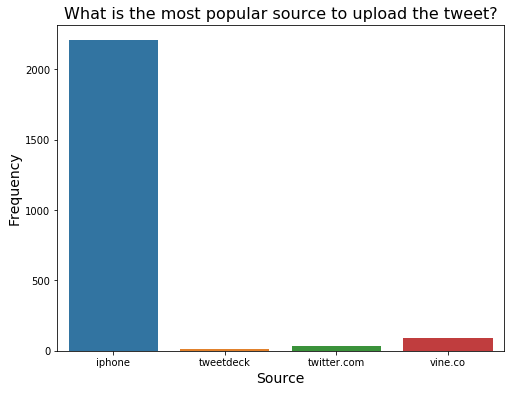

In [41]:
plt.figure(figsize=(8, 6))
sns.barplot(q1.index, q1.values)

plt.title('What is the most popular source to upload the tweet?', fontsize=16)
plt.xlabel('Source', fontsize=14)
plt.ylabel('Frequency', fontsize=14);

We can see the `iphone` is the most popular source among all!

#### Q2 - How many tweets per year?

In [109]:
df2.timestamp

0      2017-08-01 16:23:56+00:00
1      2017-08-01 00:17:27+00:00
2      2017-07-31 00:18:03+00:00
3      2017-07-30 15:58:51+00:00
4      2017-07-29 16:00:24+00:00
                  ...           
2336   2015-11-16 00:24:50+00:00
2337   2015-11-16 00:04:52+00:00
2338   2015-11-15 23:21:54+00:00
2339   2015-11-15 23:05:30+00:00
2340   2015-11-15 22:32:08+00:00
Name: timestamp, Length: 2341, dtype: datetime64[ns, UTC]

In [65]:
# Parse the year information
q2 = pd.Series(pd.DatetimeIndex(df2['timestamp']).year)

In [69]:
# show the total counts of q2 
q2 = q2.value_counts()

In [71]:
# sort by year
q2.sort_index(inplace=True)

In [108]:
q2

2015     689
2016    1175
2017     477
Name: timestamp, dtype: int64

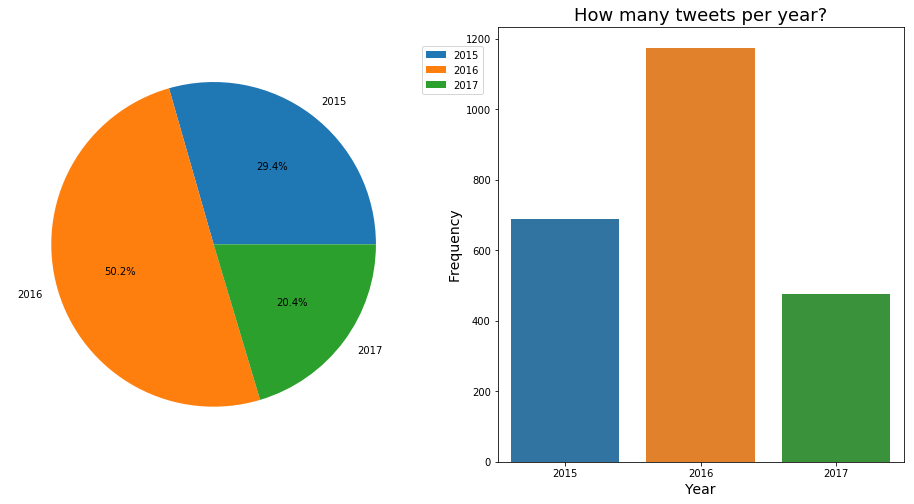

In [107]:
plt.figure(figsize=(16, 8))

# first plot
ax1 = plt.subplot(121, aspect='equal')
q2.plot.pie(autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1, 1), loc='best')
plt.ylabel('')

# second plot
ax2 = plt.subplot(122)
sns.barplot(q2.index, q2.values)
plt.title('How many tweets per year?', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Frequency', fontsize=14);

In `2015` there was **689** tweets, `2016` **1175** tweets amd `2017` **477** tweets. `2015` was collected from **November** and `2017` and at **April**. So `2015` was collected for **2 month**, `2016` **12 month** and `2017` for **8 month**. As a tweet per month `2015` is approximately **340**, `2016` is **100**, `2017` **60**. So we can think that the number of tweet uploaded per month is reducing year by year. 

**We can assume that the popularity of `WeRateDogs` are going lower and lower till 2017**

#### Q3 - What dog has the best score of all?

Because the rating is splited by `numerator` and `denominator` we have to make a combination and check the highest number of it!

In [113]:
# Find the highest score
ratings = df2.rating_numerator/df2.rating_denominator

In [115]:
ratings.sort_values(ascending=False)

308       inf
969     177.6
185      66.6
2059     42.0
184      42.0
        ...  
2076      0.1
2023      0.1
2246      0.1
310       0.0
1006      0.0
Length: 2341, dtype: float64

We can check the index `308` but seems `inf` doesn't make sense. Let's check it out

In [118]:
df2[['rating_numerator', 'rating_denominator']].iloc[308]

rating_numerator      960
rating_denominator      0
Name: 308, dtype: int64

If we think denominator is **10** then the rating is `96`. So we can see that index `969` is the highest.

In [119]:
df2[['rating_numerator', 'rating_denominator']].iloc[969]

rating_numerator      1776
rating_denominator      10
Name: 969, dtype: int64

Now let's check what dog it is!

In [120]:
df2.iloc[969]

tweet_id                                                     749981277374128128
timestamp                                             2016-07-04 15:00:45+00:00
source                                                                tweetdeck
text                             This is Atticus. He's quite simply America af.
retweeted_status_id                                                        <NA>
retweeted_status_user_id                                                   <NA>
retweeted_status_timestamp                                                  NaT
rating_numerator                                                           1776
rating_denominator                                                           10
name                                                                    atticus
doggo                                                                      <NA>
floofer                                                                    <NA>
pupper                                  

**Atticus** is the dog that has the best score! Let's look at him!
https://twitter.com/dog_rates/status/749981277374128128/photo/1
![Atticus](https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg)

#### Conclusions

We investigated 3 questions related to **WeRateDogs** tweet!

**Q1 - What is the most popular source to upload the tweet?**<br>
**Q2 - How many tweets per year?**<br>
**Q3 - What dog has the best score of all?**<br>

- `iphone` is the most popular source to upload tweet
- `2015` has 689, `2016` has 1175 and `2017` has 477 tweet
- `Atticus` is the dog that has the best score

**Limitations**
- Our dataset datetime is from `2015-11` to `2017-08` so its hard to make conclusion based on year
- The dataset was parsed at 2017. There is missing data for some tweets due to lost of permission or be deleted. So our dataset is not completed but this cannot be filled

## Part 3. Writing report

### A. Report of wrangling ✅

> **300-600 word written report that briefly describes wrangling efforts**

This project is to do wrangle and analyze on the tweet archive known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. Data wrangling was held in 3 steps gathering, assessing, and cleaning.

At the gathering step, I collect 3 datasets. The WeRateDogs Twitter archive by manual download, tweet image prediction using python requests library, and tweet's retweet count and favorite("like") count collected using Twitter API. Each dataset was stored as CSV, TSV, JSON format included txt.

At assessing step, I used python pandas. I changed each dataset to pandas DataFrame data structure and assess by visually and programmatically both. In the visual step, I looked at the records and try to find out some problems and also tried to understand the dataset properties. At programmatic step, I used useful pandas commands like info, head, sample, describe, and look at the dataset in more detail. For example, the info command helps us to look at a high-view of the dataset also shows us the data type of each column so in a short time we could skim fast.

I looked at the dataset from 2 perspectives. Tidiness and quality. There were 3 tidy issues and 13 quality issues. I didn't dive too deep to make a perfect observation but checked the issue that seems critical. Multiple variables are stored in one column, variables are stored in both rows and columns and a single observational unit is stored in multiple tables were tidiness issues and most quality issues converge to the wrong datatype, wrong data, missing data. In case of quality issues, I investigated the basis of 4 data quality dimensions completeness, validity, accuracy, and consistency.

As a cleaning step, I had to clean up the tidiness issues and quality issues found in the assessment step. First, I cleaned up the missing data because it is the most important issue. If we don't clean up the missing data it will be hard to handle further problems. And meanwhile, because the tweet_id was the most important column that will act as a key to join every table not only I did clean missing data I corrected the tweet_id using expanded_url. There were also duplicated rows of tweet_id after correcting so cleaned it up also.

After missing data was cleaned up I handle the tidiness issue. Because tidy datasets with data quality issues are almost always easier to clean than non-tidy as they have data quality issues. When we fix the quality issues first we have to do it again because when we fix the tidy issues which are structural issues we get another quality issue! When we handle tidiness issues pd.melt, pd.merge is very handy.

For quality issues, a Nullable integer type has mainly occurred. There was a problem that integer type cannot handle NaN so it automatically converted to float. So I had to use some tricks using pandas integer array. Also, erroneous datatype was an issue. Many columns that should use the bool type or int type was using object type. Datetime should not be an object and some columns like source could be much better with category datatype. Removing columns that have the same purpose as other columns were also important. For others, I had to fix an inconsistent format of name or predictions. Pandas str method was a very powerful overall handling quality issue. With regex expression str method give us tools to replace, extract, strip and indexing, etc.

After the data wrangling, only one master dataset left and for the datatype issue, it was stored to pickle format.

### B. Report of insights with visualization ✅

> **250-word-minimum written report that communicates the insights and displays the visualizations produced from wrangled data**

The dataset we are going to analyze is a tweet archive of WeRateDogs. It is consisted with tweet content and related informations like favorite number or retweet number. We can think about investigating dogs information but this dataset has only dog name, dog ratings, dog image predictions so we don't have a lot's of things to look at about dogs. So we are going to simply get insights about tweet itself and some dog insights we could get.

The 3 questions I asked for this dataset is following.

Q1 - What is the most popular source to upload the tweet?
Q2 - How many tweets per year?
Q3 - What dog has the best score of all?

First, what is the most popular source to upload the tweet? When we look inside this tweet source we could find that there is only 4 sources in total. 